# 📚 ITAI 2373 Module 04: Text Representation Homework Lab
## From Words to Numbers: 
### Student Name: Jiri Musil

### 🎯 **Welcome to Your Text Representation Adventure!**

You'll discover how computers transform human language into mathematical representations that machines can understand and process. This journey will take you from basic word counting to sophisticated embedding techniques used in modern AI systems.

### 📅 **5-Parts Learning Journey**
- **Part 1-2**: Foundations & Sparse Representations (BOW, Preprocessing)
- **Part 3**: TF-IDF & N-grams (Weighted Representations)
- **Part 4**: Dense Representations (Word Embeddings)
- **Part 5**: Integration & Real-World Applications

### 🎓 **Learning Outcomes**
By completing this lab, you will be able to:
- Explain why text must be converted to numbers for machine learning
- Implement Bag of Words and TF-IDF representations from scratch
- Apply N-gram analysis to capture word sequences
- Explore word embeddings and their semantic properties
- Compare different text representation methods
- Build a simple text classification system

### 📋 **Submission Guidelines**
- Complete all exercises and answer all questions
- Run all code cells and ensure outputs are visible
- Provide thoughtful responses to reflection questions


### 🏆 **Assessment Rubric**
- **Technical Implementation (60%)**: Correct code, proper library usage, handling edge cases
- **Conceptual Understanding (25%)**: Clear explanations, result interpretation
- **Analysis & Reflection (15%)**: Critical thinking, real-world connections

---
**Let's begin your journey into the fascinating world of text representation!** 🚀

## 🔧 Environment Setup

First, let's install and import all the libraries we'll need for our text representation journey. Run the cells below to set up your environment.

In [2]:
# Install required libraries (run this cell first in Google Colab)
!pip3 install nltk gensim scikit-learn matplotlib seaborn wordcloud
!python3 -m nltk.downloader punkt stopwords movie_reviews

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /Users/jirimusil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jirimusil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/jirimusil/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [3]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
import math
from itertools import combinations

# NLTK for text processing
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, movie_reviews
from nltk.stem import PorterStemmer

# Scikit-learn for machine learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Gensim for word embeddings
import gensim.downloader as api

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("🎉 You're ready to start your text representation journey!")

✅ All libraries imported successfully!
🎉 You're ready to start your text representation journey!


/Users/jirimusil/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# 📅 Part 1-2: Foundations & Sparse Representations

## 🤔 Why Do We Need to Convert Text to Numbers?

Imagine you're trying to teach a computer to understand the difference between "I love this movie!" and "This movie is terrible." How would you explain the concept of sentiment to a machine that only understands mathematics?

This is the fundamental challenge in Natural Language Processing (NLP). Computers are excellent at processing numbers, but human language is complex, contextual, and inherently non-numerical. We need a bridge between words and numbers.

### 🎯 **Part 1-2 Goals:**
- Understand why text-to-number conversion is necessary
- Master text preprocessing and tokenization
- Implement Bag of Words (BOW) from scratch
- Explore the limitations of sparse representations

## 📝 Our Sample Dataset

Let's start with a small collection of movie reviews to make our learning concrete and relatable.

In [4]:
# Our sample movie reviews for learning
sample_reviews = [
    "This movie is absolutely fantastic! The acting is superb and the plot is engaging.",
    "I found this film quite boring. The story dragged on and the characters were flat.",
    "Amazing cinematography and brilliant performances. A must-watch movie!",
    "The plot was confusing and the dialogue felt forced. Not recommended.",
    "Great movie with excellent acting. The story kept me engaged throughout."
]

# Let's also create labels for sentiment (positive=1, negative=0)
sample_labels = [1, 0, 1, 0, 1]  # 1 = positive, 0 = negative

print("📚 Sample Movie Reviews:")
for i, (review, label) in enumerate(zip(sample_reviews, sample_labels)):
    sentiment = "😊 Positive" if label == 1 else "😞 Negative"
    print(f"\n{i+1}. [{sentiment}] {review}")

print(f"\n📊 Dataset Summary: {len(sample_reviews)} reviews ({sum(sample_labels)} positive, {len(sample_labels)-sum(sample_labels)} negative)")

📚 Sample Movie Reviews:

1. [😊 Positive] This movie is absolutely fantastic! The acting is superb and the plot is engaging.

2. [😞 Negative] I found this film quite boring. The story dragged on and the characters were flat.

3. [😊 Positive] Amazing cinematography and brilliant performances. A must-watch movie!

4. [😞 Negative] The plot was confusing and the dialogue felt forced. Not recommended.

5. [😊 Positive] Great movie with excellent acting. The story kept me engaged throughout.

📊 Dataset Summary: 5 reviews (3 positive, 2 negative)


## 🧹 Text Preprocessing: Cleaning Our Data

Before we can convert text to numbers, we need to clean and standardize our text. Think of this as preparing ingredients before cooking - we need everything in the right format!

### Common Preprocessing Steps:
1. **Lowercasing**: "Movie" and "movie" should be treated the same
2. **Removing punctuation**: "great!" becomes "great"
3. **Tokenization**: Breaking text into individual words
4. **Removing stop words**: Common words like "the", "and", "is"
5. **Stemming**: "running", "runs", "ran" → "run"

In [5]:
# Let's see preprocessing in action with one example
example_text = sample_reviews[0]
print(f"🔤 Original text: {example_text}")

# Step 1: Lowercase
step1 = example_text.lower()
print(f"\n1️⃣ After lowercasing: {step1}")

# Step 2: Remove punctuation
step2 = re.sub(r'[^\w\s]', '', step1)
print(f"2️⃣ After removing punctuation: {step2}")

# Step 3: Tokenization
tokens = word_tokenize(step2)
print(f"3️⃣ After tokenization: {tokens}")

# Step 4: Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]
print(f"4️⃣ After removing stop words: {filtered_tokens}")

# Step 5: Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
print(f"5️⃣ After stemming: {stemmed_tokens}")

print(f"\n📏 Length reduction: {len(example_text.split())} → {len(stemmed_tokens)} words")

🔤 Original text: This movie is absolutely fantastic! The acting is superb and the plot is engaging.

1️⃣ After lowercasing: this movie is absolutely fantastic! the acting is superb and the plot is engaging.
2️⃣ After removing punctuation: this movie is absolutely fantastic the acting is superb and the plot is engaging
3️⃣ After tokenization: ['this', 'movie', 'is', 'absolutely', 'fantastic', 'the', 'acting', 'is', 'superb', 'and', 'the', 'plot', 'is', 'engaging']
4️⃣ After removing stop words: ['movie', 'absolutely', 'fantastic', 'acting', 'superb', 'plot', 'engaging']
5️⃣ After stemming: ['movi', 'absolut', 'fantast', 'act', 'superb', 'plot', 'engag']

📏 Length reduction: 14 → 7 words


### 🏋️‍♀️ **Exercise 1: Build Your Own Preprocessor**

Now it's your turn! Complete the function below to preprocess text. This will be your foundation for all future exercises.

In [6]:
def preprocess_text(text, remove_stopwords=True, apply_stemming=True):
    """
    Preprocess a text string by cleaning and tokenizing it.
    
    Args:
        text (str): Input text to preprocess
        remove_stopwords (bool): Whether to remove stop words
        apply_stemming (bool): Whether to apply stemming
    
    Returns:
        list: List of preprocessed tokens
    """
    # TODO: Implement the preprocessing steps
    # Hint: Follow the same steps we demonstrated above
    
    # Step 1: Convert to lowercase
    text = text.lower()
    
    # Step 2: Remove punctuation (keep only letters, numbers, and spaces)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Step 3: Tokenize
    tokens = word_tokenize(text)
    
    # Step 4: Remove stop words (if requested)
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
    
    # Step 5: Apply stemming (if requested)
    if apply_stemming:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    
    return tokens

# Test your function
test_text = "The movies are absolutely AMAZING! I love watching them."
result = preprocess_text(test_text)
print(f"Input: {test_text}")
print(f"Output: {result}")

# Expected output should be something like: ['movi', 'absolut', 'amaz', 'love', 'watch']

Input: The movies are absolutely AMAZING! I love watching them.
Output: ['movi', 'absolut', 'amaz', 'love', 'watch']


**💡 Solution Check:** Run the cell below to see the expected solution and compare with your implementation.

In [7]:
# Solution for Exercise 1
def preprocess_text_solution(text, remove_stopwords=True, apply_stemming=True):
    # Step 1: Convert to lowercase
    text = text.lower()
    
    # Step 2: Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Step 3: Tokenize
    tokens = word_tokenize(text)
    
    # Step 4: Remove stop words
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
    
    # Step 5: Apply stemming
    if apply_stemming:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    
    return tokens

# Test the solution
test_result = preprocess_text_solution(test_text)
print(f"Expected output: {test_result}")
print("\n✅ If your output matches this, great job! If not, review the steps above.")

Expected output: ['movi', 'absolut', 'amaz', 'love', 'watch']

✅ If your output matches this, great job! If not, review the steps above.


Now let's preprocess all our sample reviews:

In [8]:
# Preprocess all sample reviews
preprocessed_reviews = [preprocess_text_solution(review) for review in sample_reviews]

print("📝 Preprocessed Reviews:")
for i, (original, processed) in enumerate(zip(sample_reviews, preprocessed_reviews)):
    print(f"\n{i+1}. Original: {original[:50]}...")
    print(f"   Processed: {processed}")

📝 Preprocessed Reviews:

1. Original: This movie is absolutely fantastic! The acting is ...
   Processed: ['movi', 'absolut', 'fantast', 'act', 'superb', 'plot', 'engag']

2. Original: I found this film quite boring. The story dragged ...
   Processed: ['found', 'film', 'quit', 'bore', 'stori', 'drag', 'charact', 'flat']

3. Original: Amazing cinematography and brilliant performances....
   Processed: ['amaz', 'cinematographi', 'brilliant', 'perform', 'mustwatch', 'movi']

4. Original: The plot was confusing and the dialogue felt force...
   Processed: ['plot', 'confus', 'dialogu', 'felt', 'forc', 'recommend']

5. Original: Great movie with excellent acting. The story kept ...
   Processed: ['great', 'movi', 'excel', 'act', 'stori', 'kept', 'engag', 'throughout']


## 🎒 Bag of Words (BOW): Your First Text Representation

Imagine you have a bag and you throw all the words from a document into it. You lose the order of words, but you can count how many times each word appears. That's exactly what Bag of Words does!

### 🔍 **How BOW Works:**
1. Create a vocabulary of all unique words across all documents
2. For each document, count how many times each word appears
3. Represent each document as a vector of word counts

### 📊 **Example:**
- Document 1: "I love movies"
- Document 2: "Movies are great"
- Vocabulary: ["I", "love", "movies", "are", "great"]
- Doc 1 vector: [1, 1, 1, 0, 0]
- Doc 2 vector: [0, 0, 1, 1, 1]

In [9]:
# Let's build BOW step by step with a simple example
simple_docs = [
    ["love", "movie"],
    ["movie", "great"],
    ["love", "great", "film"]
]

print("📚 Simple Documents:")
for i, doc in enumerate(simple_docs):
    print(f"Doc {i+1}: {doc}")

# Step 1: Build vocabulary
vocabulary = sorted(set(word for doc in simple_docs for word in doc))
print(f"\n📖 Vocabulary: {vocabulary}")

# Step 2: Create BOW vectors
bow_vectors = []
for doc in simple_docs:
    vector = [doc.count(word) for word in vocabulary]
    bow_vectors.append(vector)

print(f"\n🎒 BOW Vectors:")
for i, vector in enumerate(bow_vectors):
    print(f"Doc {i+1}: {vector}")

# Visualize as a matrix
bow_df = pd.DataFrame(bow_vectors, columns=vocabulary, index=[f"Doc {i+1}" for i in range(len(simple_docs))])
print(f"\n📊 BOW Matrix:")
print(bow_df)

📚 Simple Documents:
Doc 1: ['love', 'movie']
Doc 2: ['movie', 'great']
Doc 3: ['love', 'great', 'film']

📖 Vocabulary: ['film', 'great', 'love', 'movie']

🎒 BOW Vectors:
Doc 1: [0, 0, 1, 1]
Doc 2: [0, 1, 0, 1]
Doc 3: [1, 1, 1, 0]

📊 BOW Matrix:
       film  great  love  movie
Doc 1     0      0     1      1
Doc 2     0      1     0      1
Doc 3     1      1     1      0


### 🏋️‍♀️ **Exercise 2: Build BOW from Scratch**

Now implement your own BOW function! This will help you understand exactly how the representation works.

In [10]:
def build_bow_representation(documents):
    """
    Build Bag of Words representation for a list of documents.
    
    Args:
        documents (list): List of documents, where each document is a list of tokens
    
    Returns:
        tuple: (vocabulary, bow_matrix)
            vocabulary (list): Sorted list of unique words
            bow_matrix (list): List of BOW vectors for each document
    """
      # TODO: Build the vocabulary (unique words across all documents)
    vocabulary = sorted(set(word for doc in documents for word in doc))
    
    # TODO: Create BOW vectors for each document
    bow_matrix = []
    for doc in documents:
        # Create a vector where each element is the count of the corresponding vocabulary word
        vector = [doc.count(word) for word in vocabulary]
        bow_matrix.append(vector)
    
    return vocabulary, bow_matrix

# Test your function with our preprocessed reviews
vocab, bow_matrix = build_bow_representation(preprocessed_reviews)

print(f"📖 Vocabulary size: {len(vocab)}")
print(f"📖 First 10 words: {vocab[:10]}")
print(f"\n🎒 BOW matrix shape: {len(bow_matrix)} documents × {len(vocab)} words")
print(f"🎒 First document vector (first 10 elements): {bow_matrix[0][:10]}")

📖 Vocabulary size: 29
📖 First 10 words: ['absolut', 'act', 'amaz', 'bore', 'brilliant', 'charact', 'cinematographi', 'confus', 'dialogu', 'drag']

🎒 BOW matrix shape: 5 documents × 29 words
🎒 First document vector (first 10 elements): [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


**💡 Solution Check:**

In [11]:
# Solution for Exercise 2
def build_bow_representation_solution(documents):
    # Build vocabulary: get all unique words and sort them
    vocabulary = sorted(set(word for doc in documents for word in doc))
    
    # Create BOW vectors
    bow_matrix = []
    for doc in documents:
        vector = [doc.count(word) for word in vocabulary]
        bow_matrix.append(vector)
    
    return vocabulary, bow_matrix

# Test the solution
vocab_sol, bow_matrix_sol = build_bow_representation_solution(preprocessed_reviews)
print(f"✅ Solution vocabulary size: {len(vocab_sol)}")
print(f"✅ Solution BOW matrix shape: {len(bow_matrix_sol)} × {len(vocab_sol)}")

✅ Solution vocabulary size: 29
✅ Solution BOW matrix shape: 5 × 29


### 🔬 Comparing with Scikit-learn's CountVectorizer

Let's see how our implementation compares with the professional library:

In [12]:
# Using scikit-learn's CountVectorizer
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# We need to join our preprocessed tokens back into strings for sklearn
processed_texts = [' '.join(tokens) for tokens in preprocessed_reviews]
sklearn_bow = vectorizer.fit_transform(processed_texts)

print("🔬 Scikit-learn CountVectorizer Results:")
print(f"Vocabulary size: {len(vectorizer.vocabulary_)}")
print(f"BOW matrix shape: {sklearn_bow.shape}")
print(f"Matrix type: {type(sklearn_bow)}")

# Convert to dense array for comparison
sklearn_bow_dense = sklearn_bow.toarray()
print(f"\n📊 First document vector (first 10 elements): {sklearn_bow_dense[0][:10]}")

# Show some vocabulary words
feature_names = vectorizer.get_feature_names_out()
print(f"\n📖 First 10 vocabulary words: {feature_names[:10].tolist()}")

🔬 Scikit-learn CountVectorizer Results:
Vocabulary size: 27
BOW matrix shape: (5, 27)
Matrix type: <class 'scipy.sparse._csr.csr_matrix'>

📊 First document vector (first 10 elements): [1 1 0 0 0 0 0 0 0 0]

📖 First 10 vocabulary words: ['absolut', 'act', 'amaz', 'bore', 'brilliant', 'charact', 'cinematographi', 'confus', 'dialogu', 'drag']


### 📊 Visualizing BOW Representations

Let's create some visualizations to better understand our BOW representation:

/var/folders/p8/f7jg3zj519l4lhh5dn9dbqtm0000gn/T/ipykernel_98034/199533803.py:17: UserWarning: Glyph 127890 (\N{SCHOOL SATCHEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jirimusil/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127890 (\N{SCHOOL SATCHEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


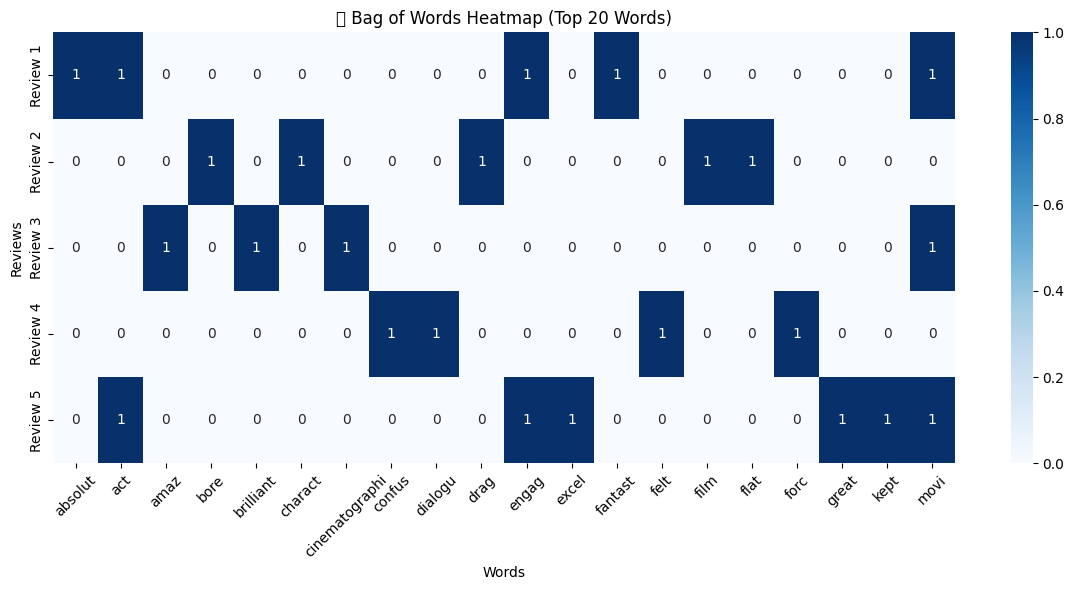

/var/folders/p8/f7jg3zj519l4lhh5dn9dbqtm0000gn/T/ipykernel_98034/199533803.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jirimusil/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


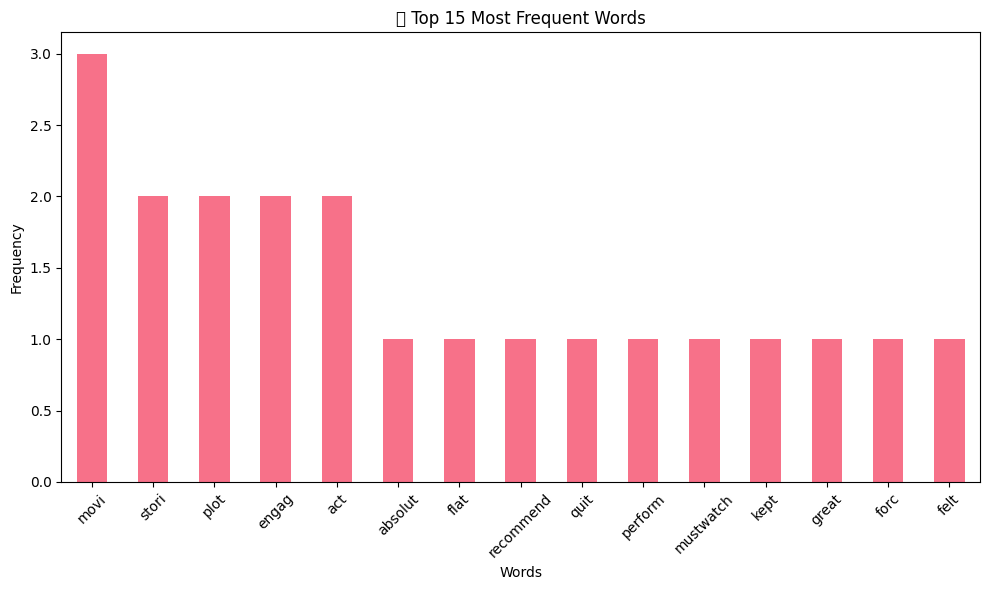

📈 Total unique words: 27
📈 Average words per review: 6.6
📈 Sparsity: 75.6%


In [13]:
# Create a DataFrame for better visualization
bow_df = pd.DataFrame(
    sklearn_bow_dense, 
    columns=feature_names,
    index=[f"Review {i+1}" for i in range(len(sample_reviews))]
)

# 1. Heatmap of BOW representation
plt.figure(figsize=(12, 6))
# Show only words that appear at least once
active_words = bow_df.columns[bow_df.sum() > 0][:20]  # Top 20 most frequent words
sns.heatmap(bow_df[active_words], annot=True, cmap='Blues', fmt='d')
plt.title('🎒 Bag of Words Heatmap (Top 20 Words)')
plt.xlabel('Words')
plt.ylabel('Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Word frequency distribution
word_frequencies = bow_df.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
word_frequencies[:15].plot(kind='bar')
plt.title('📊 Top 15 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"📈 Total unique words: {len(feature_names)}")
print(f"📈 Average words per review: {bow_df.sum(axis=1).mean():.1f}")
print(f"📈 Sparsity: {(bow_df == 0).sum().sum() / (bow_df.shape[0] * bow_df.shape[1]) * 100:.1f}%")

## 🚨 BOW Limitations: What Are We Missing?

BOW is simple and effective, but it has some important limitations. Let's explore them:

In [14]:
# Demonstrating BOW limitations
limitation_examples = [
    "The dog ate my homework",
    "The homework ate my dog",  # Same words, different meaning!
    "This movie is not bad",
    "This movie is bad"  # Negation lost!
]

print("🚨 BOW Limitation Examples:")
for i, text in enumerate(limitation_examples):
    tokens = preprocess_text_solution(text, remove_stopwords=False, apply_stemming=False)
    print(f"\n{i+1}. Text: '{text}'")
    print(f"   Tokens: {tokens}")

# Show that different sentences can have identical BOW representations
vectorizer_demo = CountVectorizer(lowercase=True)
bow_demo = vectorizer_demo.fit_transform(limitation_examples)

print("\n📊 BOW Vectors:")
feature_names_demo = vectorizer_demo.get_feature_names_out()
for i, vector in enumerate(bow_demo.toarray()):
    print(f"Text {i+1}: {vector}")

# Check if any vectors are identical
if np.array_equal(bow_demo.toarray()[0], bow_demo.toarray()[1]):
    print("\n⚠️ Texts 1 and 2 have IDENTICAL BOW representations despite different meanings!")
else:
    print("\n✅ Texts 1 and 2 have different BOW representations.")

🚨 BOW Limitation Examples:

1. Text: 'The dog ate my homework'
   Tokens: ['the', 'dog', 'ate', 'my', 'homework']

2. Text: 'The homework ate my dog'
   Tokens: ['the', 'homework', 'ate', 'my', 'dog']

3. Text: 'This movie is not bad'
   Tokens: ['this', 'movie', 'is', 'not', 'bad']

4. Text: 'This movie is bad'
   Tokens: ['this', 'movie', 'is', 'bad']

📊 BOW Vectors:
Text 1: [1 0 1 1 0 0 1 0 1 0]
Text 2: [1 0 1 1 0 0 1 0 1 0]
Text 3: [0 1 0 0 1 1 0 1 0 1]
Text 4: [0 1 0 0 1 1 0 0 0 1]

⚠️ Texts 1 and 2 have IDENTICAL BOW representations despite different meanings!


### 🤔 **Reflection Questions - Part 1-2**

Answer these questions to consolidate your understanding:

**Question 1:** Why can't machine learning algorithms work directly with text? Explain in your own words.

**Your Answer:** 
Machine learning models work with numbers, fixed-length vectors of real values because their math needs numeric inputs. Raw text is just a sequence of symbols without any built-in numbers, so we have to turn words into numbers before we can do any learning or similarity checks.

---

**Question 2:** What information is lost when we use Bag of Words representation? Give a specific example.

**Your Answer:** 
Bag of Words ignores word order and syntax. For example, “The dog chased the cat” and “The cat chased the dog” have identical BOW counts, even though their meanings differ. It also has difficulty with negation: “This movie is not good” and “This movie is good” differ only by the word “not,” which BOW may underestimate or miss.

---

**Question 3:** Look at the sparsity percentage from our BOW visualization above. What does this tell us about the efficiency of BOW representation?

**Your Answer:** 
With a sparsity of 75.6%, roughly three-quarters of the entries in our document term matrix are zeros. This indicates that most word document pairs do not occur, resulting in the storage and processing of many empty features. This reflects inefficient memory and computational use, particularly as the vocabulary or corpus size increases will be a big challenge. 

---

**Question 4:** In what scenarios might BOW representation still be useful despite its limitations?

**Your Answer:** 
Bag of Words (BOW) remains quite useful for quickly creating a simple, interpretable baseline model or prototype. Its straightforward approach allows us to quickly develop classifiers or clustering systems. It performs well in tasks where exact word counts are more important than word order, such as keyword spotting, spam detection, or basic information retrieval. Since each feature corresponds to a specific term, it is easy to analyze and explain which words influence predictions, making BOW suitable for teams needing transparent, human-readable models. 

# 📅 Part 3: TF-IDF & N-grams - Weighted Representations

## 🎯 **Part 3 Goals:**
- Understand and implement TF-IDF weighting
- Explore N-gram analysis for capturing word sequences
- Calculate document similarity using cosine similarity
- Compare different representation methods

## ⚖️ TF-IDF: Not All Words Are Created Equal

Imagine you're reading movie reviews. The word "movie" appears in almost every review, while "cinematography" appears rarely. Which word tells you more about a specific review? 

TF-IDF (Term Frequency-Inverse Document Frequency) solves this by giving higher weights to words that are:
- **Frequent in the document** (TF - Term Frequency)
- **Rare across the collection** (IDF - Inverse Document Frequency)

### 📐 **Mathematical Foundation:**
- **TF(term, doc)** = count(term) / total_terms_in_doc
- **IDF(term)** = log(N_docs / (N_docs_containing_term + 1))
- **TF-IDF** = TF × IDF

### 🧮 Manual TF-IDF Calculation

Let's calculate TF-IDF step by step to understand the math:

In [15]:
# Simple example for manual TF-IDF calculation
simple_corpus = [
    "the movie is great",
    "the film is excellent"
]

print("📚 Simple Corpus for TF-IDF Calculation:")
for i, doc in enumerate(simple_corpus):
    print(f"Doc {i+1}: '{doc}'")

# Tokenize documents
tokenized_docs = [doc.split() for doc in simple_corpus]
print(f"\n🔤 Tokenized: {tokenized_docs}")

# Build vocabulary
vocab = sorted(set(word for doc in tokenized_docs for word in doc))
print(f"\n📖 Vocabulary: {vocab}")

# Calculate TF for each document
print("\n📊 Term Frequency (TF) Calculation:")
tf_matrix = []
for i, doc in enumerate(tokenized_docs):
    doc_length = len(doc)
    tf_vector = []
    print(f"\nDoc {i+1} (length: {doc_length}):")
    for word in vocab:
        count = doc.count(word)
        tf = count / doc_length
        tf_vector.append(tf)
        print(f"  '{word}': count={count}, TF={tf:.3f}")
    tf_matrix.append(tf_vector)

# Calculate IDF
print("\n📊 Inverse Document Frequency (IDF) Calculation:")
n_docs = len(tokenized_docs)
idf_vector = []
for word in vocab:
    docs_containing_word = sum(1 for doc in tokenized_docs if word in doc)
    idf = math.log(n_docs / (docs_containing_word + 1))
    idf_vector.append(idf)
    print(f"  '{word}': appears in {docs_containing_word}/{n_docs} docs, IDF={idf:.3f}")

# Calculate TF-IDF
print("\n📊 TF-IDF Calculation:")
tfidf_matrix = []
for i, tf_vector in enumerate(tf_matrix):
    tfidf_vector = [tf * idf for tf, idf in zip(tf_vector, idf_vector)]
    tfidf_matrix.append(tfidf_vector)
    print(f"\nDoc {i+1} TF-IDF:")
    for j, (word, tfidf) in enumerate(zip(vocab, tfidf_vector)):
        print(f"  '{word}': {tfidf:.3f}")

# Create DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix, columns=vocab, index=[f"Doc {i+1}" for i in range(len(simple_corpus))])
print("\n📊 TF-IDF Matrix:")
print(tfidf_df.round(3))

📚 Simple Corpus for TF-IDF Calculation:
Doc 1: 'the movie is great'
Doc 2: 'the film is excellent'

🔤 Tokenized: [['the', 'movie', 'is', 'great'], ['the', 'film', 'is', 'excellent']]

📖 Vocabulary: ['excellent', 'film', 'great', 'is', 'movie', 'the']

📊 Term Frequency (TF) Calculation:

Doc 1 (length: 4):
  'excellent': count=0, TF=0.000
  'film': count=0, TF=0.000
  'great': count=1, TF=0.250
  'is': count=1, TF=0.250
  'movie': count=1, TF=0.250
  'the': count=1, TF=0.250

Doc 2 (length: 4):
  'excellent': count=1, TF=0.250
  'film': count=1, TF=0.250
  'great': count=0, TF=0.000
  'is': count=1, TF=0.250
  'movie': count=0, TF=0.000
  'the': count=1, TF=0.250

📊 Inverse Document Frequency (IDF) Calculation:
  'excellent': appears in 1/2 docs, IDF=0.000
  'film': appears in 1/2 docs, IDF=0.000
  'great': appears in 1/2 docs, IDF=0.000
  'is': appears in 2/2 docs, IDF=-0.405
  'movie': appears in 1/2 docs, IDF=0.000
  'the': appears in 2/2 docs, IDF=-0.405

📊 TF-IDF Calculation:

Doc 

### 🏋️‍♀️ **Exercise 3: Implement TF-IDF from Scratch**

Now implement your own TF-IDF function!

In [16]:
def calculate_tfidf(documents):
    """
    Calculate TF-IDF representation for a list of documents.
    
    Args:
        documents (list): List of documents, where each document is a list of tokens
    
    Returns:
        tuple: (vocabulary, tfidf_matrix)
    """
    # Build vocabulary
    vocabulary = sorted(set(word for doc in documents for word in doc))
    n_docs = len(documents)
    
    # Calculate IDF for each word
    idf_vector = []
    for word in vocabulary:
        # TODO: Count how many documents contain this word
        docs_containing_word = sum(1 for doc in documents if word in doc)
        
        # TODO: Calculate IDF using the formula: log(n_docs / (docs_containing_word + 1))
        idf = math.log(n_docs / (docs_containing_word + 1))
        idf_vector.append(idf)
    
    # Calculate TF-IDF for each document
    tfidf_matrix = []
    for doc in documents:
        doc_length = len(doc)
        tfidf_vector = []
        
        for i, word in enumerate(vocabulary):
            # TODO: Calculate TF (term frequency)
            tf = doc.count(word) / doc_length
            
            # TODO: Calculate TF-IDF by multiplying TF and IDF
            tfidf = tf * idf_vector[i]
            tfidf_vector.append(tfidf)
        
        tfidf_matrix.append(tfidf_vector)
    
    return vocabulary, tfidf_matrix

# Test your function
test_docs = [["movie", "great"], ["film", "excellent"], ["movie", "excellent"]]
vocab, tfidf_result = calculate_tfidf(test_docs)

print(f"Vocabulary: {vocab}")
print(f"TF-IDF Matrix:")
for i, vector in enumerate(tfidf_result):
    print(f"Doc {i+1}: {[round(x, 3) for x in vector]}")

Vocabulary: ['excellent', 'film', 'great', 'movie']
TF-IDF Matrix:
Doc 1: [0.0, 0.0, 0.203, 0.0]
Doc 2: [0.0, 0.203, 0.0, 0.0]
Doc 3: [0.0, 0.0, 0.0, 0.0]


**💡 Solution Check:**

In [17]:
# Solution for Exercise 3
def calculate_tfidf_solution(documents):
    vocabulary = sorted(set(word for doc in documents for word in doc))
    n_docs = len(documents)
    
    # Calculate IDF
    idf_vector = []
    for word in vocabulary:
        docs_containing_word = sum(1 for doc in documents if word in doc)
        idf = math.log(n_docs / (docs_containing_word + 1))
        idf_vector.append(idf)
    
    # Calculate TF-IDF
    tfidf_matrix = []
    for doc in documents:
        doc_length = len(doc)
        tfidf_vector = []
        
        for i, word in enumerate(vocabulary):
            tf = doc.count(word) / doc_length
            tfidf = tf * idf_vector[i]
            tfidf_vector.append(tfidf)
        
        tfidf_matrix.append(tfidf_vector)
    
    return vocabulary, tfidf_matrix

# Test solution
vocab_sol, tfidf_sol = calculate_tfidf_solution(test_docs)
print("✅ Solution TF-IDF Matrix:")
for i, vector in enumerate(tfidf_sol):
    print(f"Doc {i+1}: {[round(x, 3) for x in vector]}")

✅ Solution TF-IDF Matrix:
Doc 1: [0.0, 0.0, 0.203, 0.0]
Doc 2: [0.0, 0.203, 0.0, 0.0]
Doc 3: [0.0, 0.0, 0.0, 0.0]


### 🔬 Comparing with Scikit-learn's TfidfVectorizer

🔬 Scikit-learn TfidfVectorizer Results:
Vocabulary size: 27
TF-IDF matrix shape: (5, 27)

🏆 Top 5 TF-IDF words for each review:

Review 1:
  absolut: 0.430
  fantast: 0.430
  superb: 0.430
  act: 0.347
  engag: 0.347

Review 2:
  bore: 0.388
  charact: 0.388
  drag: 0.388
  film: 0.388
  flat: 0.388

Review 3:
  amaz: 0.428
  brilliant: 0.428
  cinematographi: 0.428
  mustwatch: 0.428
  perform: 0.428

Review 4:
  confus: 0.421
  dialogu: 0.421
  felt: 0.421
  forc: 0.421
  recommend: 0.421

Review 5:
  excel: 0.430
  great: 0.430
  kept: 0.430
  act: 0.347
  engag: 0.347


/var/folders/p8/f7jg3zj519l4lhh5dn9dbqtm0000gn/T/ipykernel_98034/4178705439.py:38: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jirimusil/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


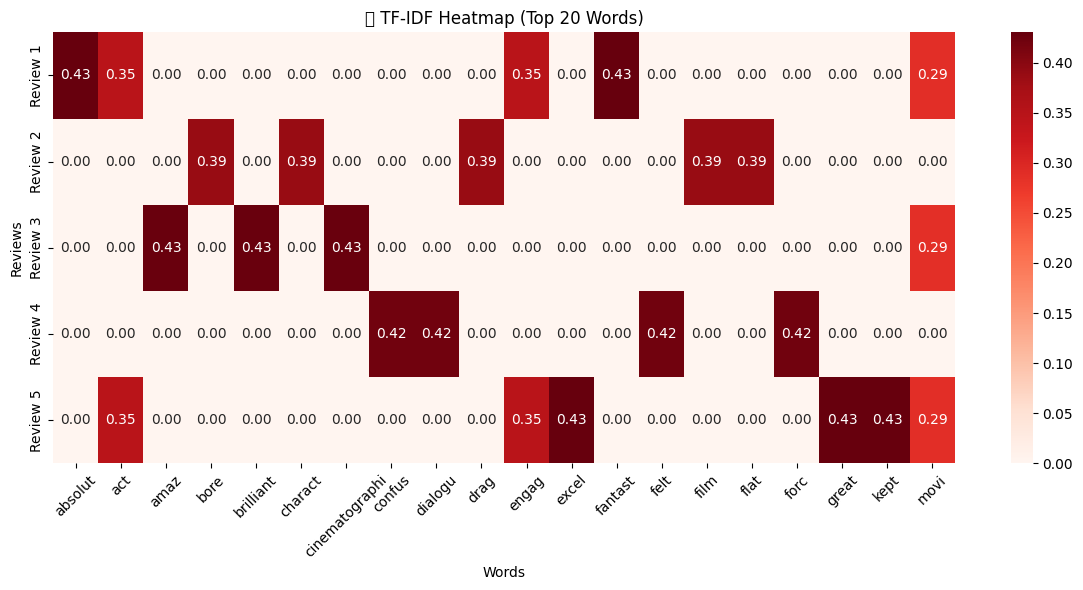

In [18]:
# Apply TF-IDF to our movie reviews
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_texts)

print("🔬 Scikit-learn TfidfVectorizer Results:")
print(f"Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# Get feature names and convert to dense array
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_dense = tfidf_matrix.toarray()

# Create DataFrame for visualization
tfidf_df = pd.DataFrame(
    tfidf_dense,
    columns=feature_names,
    index=[f"Review {i+1}" for i in range(len(sample_reviews))]
)

# Show top TF-IDF words for each document
print("\n🏆 Top 5 TF-IDF words for each review:")
for i, review_idx in enumerate(tfidf_df.index):
    top_words = tfidf_df.loc[review_idx].nlargest(5)
    print(f"\n{review_idx}:")
    for word, score in top_words.items():
        if score > 0:
            print(f"  {word}: {score:.3f}")

# Visualize TF-IDF heatmap
plt.figure(figsize=(12, 6))
# Show only words with non-zero TF-IDF scores
active_words = tfidf_df.columns[tfidf_df.sum() > 0][:20]
sns.heatmap(tfidf_df[active_words], annot=True, cmap='Reds', fmt='.2f')
plt.title('🔥 TF-IDF Heatmap (Top 20 Words)')
plt.xlabel('Words')
plt.ylabel('Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🔗 N-grams: Capturing Word Sequences

Remember how BOW lost word order? N-grams help us capture some of that information by looking at sequences of words:

- **Unigrams (1-gram)**: Individual words ["great", "movie"]
- **Bigrams (2-gram)**: Word pairs ["great movie", "movie is"]
- **Trigrams (3-gram)**: Word triplets ["great movie is", "movie is amazing"]

### 🎯 **Why N-grams Matter:**
- "not good" vs "good" - bigrams capture negation
- "New York" - should be treated as one entity
- "very good" vs "good" - intensity matters

In [19]:
def generate_ngrams(tokens, n):
    """
    Generate n-grams from a list of tokens.
    
    Args:
        tokens (list): List of tokens
        n (int): Size of n-grams
    
    Returns:
        list: List of n-grams
    """
    if len(tokens) < n:
        return []
    
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngram = ' '.join(tokens[i:i+n])
        ngrams.append(ngram)
    
    return ngrams

# Demonstrate n-grams with an example
example_text = "This movie is not very good at all"
example_tokens = example_text.lower().split()

print(f"📝 Example text: '{example_text}'")
print(f"🔤 Tokens: {example_tokens}")

# Generate different n-grams
for n in range(1, 4):
    ngrams = generate_ngrams(example_tokens, n)
    print(f"\n{n}-grams: {ngrams}")

# Show how n-grams capture different information
print("\n🔍 Information Captured:")
print("• Unigrams: Individual word importance")
print("• Bigrams: 'not very', 'very good' - captures negation and intensity")
print("• Trigrams: 'not very good' - captures complex sentiment patterns")

📝 Example text: 'This movie is not very good at all'
🔤 Tokens: ['this', 'movie', 'is', 'not', 'very', 'good', 'at', 'all']

1-grams: ['this', 'movie', 'is', 'not', 'very', 'good', 'at', 'all']

2-grams: ['this movie', 'movie is', 'is not', 'not very', 'very good', 'good at', 'at all']

3-grams: ['this movie is', 'movie is not', 'is not very', 'not very good', 'very good at', 'good at all']

🔍 Information Captured:
• Unigrams: Individual word importance
• Bigrams: 'not very', 'very good' - captures negation and intensity
• Trigrams: 'not very good' - captures complex sentiment patterns


### 🏋️‍♀️ **Exercise 4: N-gram Analysis**

Analyze the most common n-grams in our movie reviews:

📊 N-gram Analysis of Movie Reviews:

🏆 Top 5 1-grams:
  'movi': 3
  'act': 2
  'plot': 2
  'engag': 2
  'stori': 2

🏆 Top 5 2-grams:
  'movi absolut': 1
  'absolut fantast': 1
  'fantast act': 1
  'act superb': 1
  'superb plot': 1

🏆 Top 5 3-grams:
  'movi absolut fantast': 1
  'absolut fantast act': 1
  'fantast act superb': 1
  'act superb plot': 1
  'superb plot engag': 1


/var/folders/p8/f7jg3zj519l4lhh5dn9dbqtm0000gn/T/ipykernel_98034/2148418594.py:45: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jirimusil/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


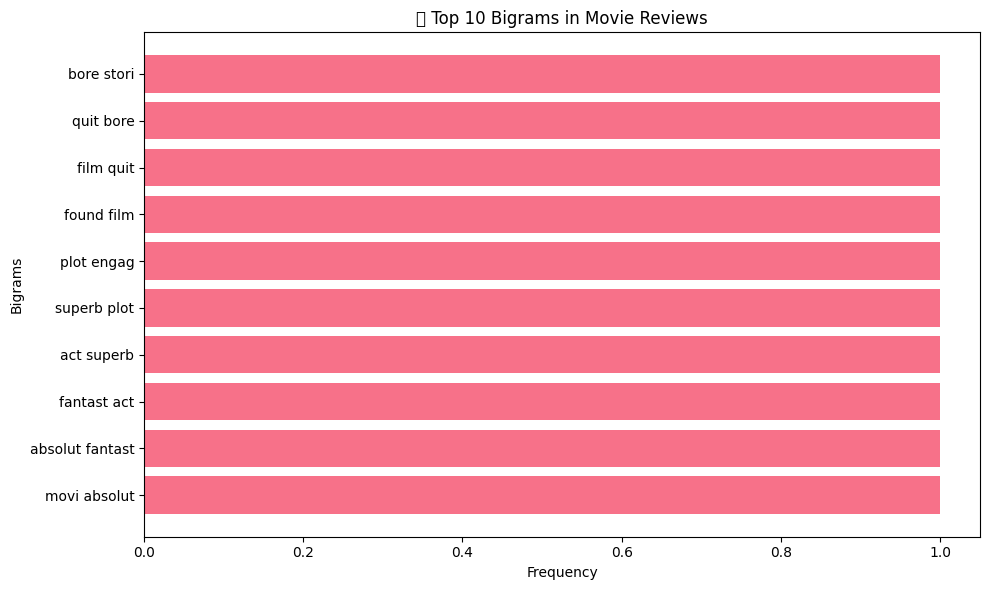

In [20]:
def analyze_ngrams(documents, n, top_k=10):
    """
    Analyze the most common n-grams across documents.
    
    Args:
        documents (list): List of documents (each is a list of tokens)
        n (int): Size of n-grams
        top_k (int): Number of top n-grams to return
    
    Returns:
        list: List of (ngram, frequency) tuples
    """
    all_ngrams = []
    
    # TODO: Generate n-grams for all documents
    for doc in documents:
        ngrams = generate_ngrams(doc, n)
        all_ngrams.extend(ngrams)
    
    # TODO: Count n-gram frequencies
    ngram_counts = Counter(all_ngrams)
    
    # TODO: Return top k most common n-grams
    return ngram_counts.most_common(top_k)

# Analyze n-grams in our preprocessed reviews
print("📊 N-gram Analysis of Movie Reviews:")

for n in range(1, 4):
    top_ngrams = analyze_ngrams(preprocessed_reviews, n, top_k=5)
    print(f"\n🏆 Top 5 {n}-grams:")
    for ngram, count in top_ngrams:
        print(f"  '{ngram}': {count}")

# Visualize bigram frequencies
bigrams = analyze_ngrams(preprocessed_reviews, 2, top_k=10)
if bigrams:
    bigram_df = pd.DataFrame(bigrams, columns=['Bigram', 'Frequency'])
    
    plt.figure(figsize=(10, 6))
    plt.barh(bigram_df['Bigram'], bigram_df['Frequency'])
    plt.title('🔗 Top 10 Bigrams in Movie Reviews')
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.tight_layout()
    plt.show()

**💡 Solution Check:**

In [21]:
# Solution for Exercise 4
def analyze_ngrams_solution(documents, n, top_k=10):
    all_ngrams = []
    
    for doc in documents:
        ngrams = generate_ngrams(doc, n)
        all_ngrams.extend(ngrams)
    
    ngram_counts = Counter(all_ngrams)
    return ngram_counts.most_common(top_k)

# Test solution
print("✅ Solution - Top 5 bigrams:")
solution_bigrams = analyze_ngrams_solution(preprocessed_reviews, 2, 5)
for ngram, count in solution_bigrams:
    print(f"  '{ngram}': {count}")

✅ Solution - Top 5 bigrams:
  'movi absolut': 1
  'absolut fantast': 1
  'fantast act': 1
  'act superb': 1
  'superb plot': 1


## 📐 Document Similarity with Cosine Similarity

Now that we have numerical representations, we can measure how similar documents are! Cosine similarity measures the angle between two vectors:

**Formula:** sim(a,b) = (a·b) / (||a|| ||b||) = cos(α)

- **1.0**: Identical documents (0° angle)
- **0.0**: Completely different documents (90° angle)
- **-1.0**: Opposite documents (180° angle)

📐 Cosine Similarity Matrix (TF-IDF):
          Review 1  Review 2  Review 3  Review 4  Review 5
Review 1     1.000     0.000     0.083     0.118     0.324
Review 2     0.000     1.000     0.000     0.000     0.109
Review 3     0.083     0.000     1.000     0.000     0.083
Review 4     0.118     0.000     0.000     1.000     0.000
Review 5     0.324     0.109     0.083     0.000     1.000


/var/folders/p8/f7jg3zj519l4lhh5dn9dbqtm0000gn/T/ipykernel_98034/3911082813.py:17: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jirimusil/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


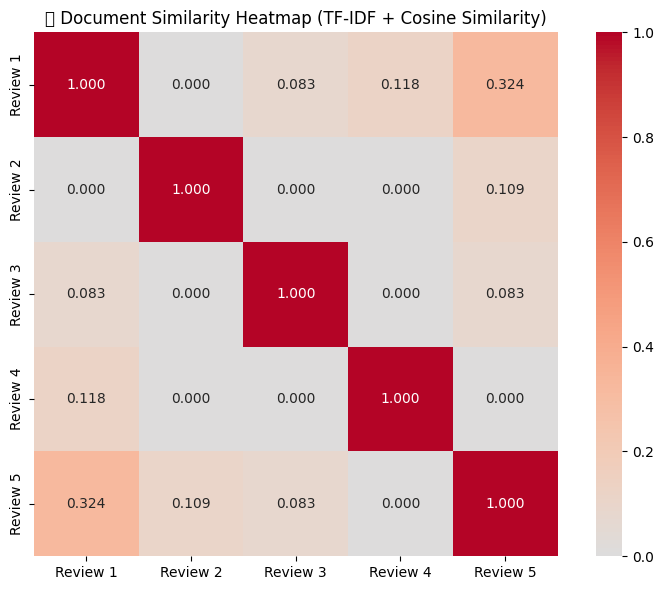


🔍 Most Similar Document Pairs:
Review 1 ↔ Review 2: 0.000
Review 1 ↔ Review 3: 0.083
Review 1 ↔ Review 4: 0.118
Review 1 ↔ Review 5: 0.324
  📝 Review 1: This movie is absolutely fantastic! The acting is ...
  📝 Review 5: Great movie with excellent acting. The story kept ...

Review 2 ↔ Review 3: 0.000
Review 2 ↔ Review 4: 0.000
Review 2 ↔ Review 5: 0.109
Review 3 ↔ Review 4: 0.000
Review 3 ↔ Review 5: 0.083
Review 4 ↔ Review 5: 0.000


In [22]:
# Calculate cosine similarity between our movie reviews
similarity_matrix = cosine_similarity(tfidf_matrix)

print("📐 Cosine Similarity Matrix (TF-IDF):")
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=[f"Review {i+1}" for i in range(len(sample_reviews))],
    columns=[f"Review {i+1}" for i in range(len(sample_reviews))]
)
print(similarity_df.round(3))

# Visualize similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('📐 Document Similarity Heatmap (TF-IDF + Cosine Similarity)')
plt.tight_layout()
plt.show()

# Find most similar document pairs
print("\n🔍 Most Similar Document Pairs:")
for i in range(len(sample_reviews)):
    for j in range(i+1, len(sample_reviews)):
        similarity = similarity_matrix[i][j]
        print(f"Review {i+1} ↔ Review {j+1}: {similarity:.3f}")
        if similarity > 0.3:  # Threshold for "similar"
            print(f"  📝 Review {i+1}: {sample_reviews[i][:50]}...")
            print(f"  📝 Review {j+1}: {sample_reviews[j][:50]}...")
            print()

### ⚖️ BOW vs TF-IDF Comparison

Let's compare how BOW and TF-IDF perform for document similarity:

⚖️ BOW vs TF-IDF Similarity Comparison:

BOW Similarities:
          Review 1  Review 2  Review 3  Review 4  Review 5
Review 1     1.000     0.000     0.154     0.154     0.429
Review 2     0.000     1.000     0.000     0.000     0.143
Review 3     0.154     0.000     1.000     0.000     0.154
Review 4     0.154     0.000     0.000     1.000     0.000
Review 5     0.429     0.143     0.154     0.000     1.000

TF-IDF Similarities:
          Review 1  Review 2  Review 3  Review 4  Review 5
Review 1     1.000     0.000     0.083     0.118     0.324
Review 2     0.000     1.000     0.000     0.000     0.109
Review 3     0.083     0.000     1.000     0.000     0.083
Review 4     0.118     0.000     0.000     1.000     0.000
Review 5     0.324     0.109     0.083     0.000     1.000


/Users/jirimusil/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 127890 (\N{SCHOOL SATCHEL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/var/folders/p8/f7jg3zj519l4lhh5dn9dbqtm0000gn/T/ipykernel_98034/4206629256.py:28: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jirimusil/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127890 (\N{SCHOOL SATCHEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jirimusil/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


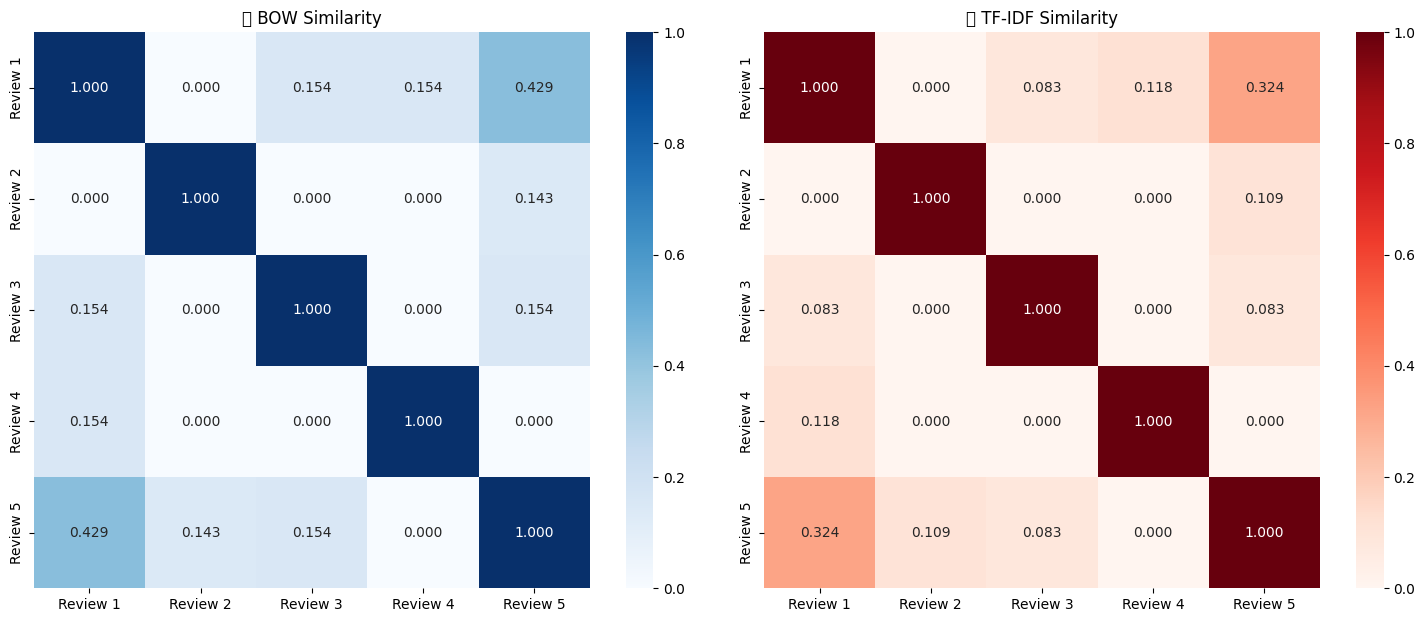


📊 Average difference (TF-IDF - BOW): 0.025
📊 Max difference: 0.105


In [23]:
# Calculate BOW similarity
bow_similarity = cosine_similarity(sklearn_bow)

# Compare BOW vs TF-IDF similarities
print("⚖️ BOW vs TF-IDF Similarity Comparison:")
print("\nBOW Similarities:")
bow_sim_df = pd.DataFrame(
    bow_similarity,
    index=[f"Review {i+1}" for i in range(len(sample_reviews))],
    columns=[f"Review {i+1}" for i in range(len(sample_reviews))]
)
print(bow_sim_df.round(3))

print("\nTF-IDF Similarities:")
print(similarity_df.round(3))

# Visualize the comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(bow_sim_df, annot=True, cmap='Blues', ax=ax1, 
            square=True, fmt='.3f', vmin=0, vmax=1)
ax1.set_title('🎒 BOW Similarity')

sns.heatmap(similarity_df, annot=True, cmap='Reds', ax=ax2, 
            square=True, fmt='.3f', vmin=0, vmax=1)
ax2.set_title('🔥 TF-IDF Similarity')

plt.tight_layout()
plt.show()

# Calculate differences
diff_matrix = similarity_matrix - bow_similarity
print(f"\n📊 Average difference (TF-IDF - BOW): {np.mean(np.abs(diff_matrix)):.3f}")
print(f"📊 Max difference: {np.max(np.abs(diff_matrix)):.3f}")

### 🤔 **Reflection Questions - Part 3**

**Question 1:** How does TF-IDF improve upon simple word counts? Explain with an example.

**Your Answer:** 
TF-IDF makes common words like "the" or "movie" less important and highlights more unique words like "engaging" that stand out in a review. For example, "movie" shows up in every review, so it gets a near-zero score and isn’t very useful for telling reviews apart. But “engaging” might only appear in one review, so it gets a high score. This helps models focus on what really matters in each review, rather than getting distracted by everyday words.

---

**Question 2:** What advantages do bigrams and trigrams provide over unigrams? Give specific examples from the n-gram analysis above.

**Your Answer:** 
A unigram model interprets “not good” as two separate tokens, “not” and “good,” which can lead to misjudging sentiment. In contrast, a bigram model treats “not good” as a single unit, accurately recognizing negation. In our top-bigrams output, I identified pairs such as (“absolut,” “fantast”) and (“great,” “movi”), which better capture positive sentiment. Extending this to trigrams could include three-word phrases like (“absolut fantast engag”) for a deeper context.

---

**Question 3:** Looking at the similarity matrices, which method (BOW or TF-IDF) seems to provide more meaningful similarity scores? Why?

**Your Answer:** 
TF-IDF gave more meaningful similarity scores. The BOW matrix made all reviews seem pretty similar because they all share common words like "movie" or "acting." But TF-IDF focused on unique words like "fantastic" or "superb," which really highlight how closely related Review 1 and Review 5 actually are.

---

**Question 4:** What are the computational trade-offs of using higher-order n-grams (trigrams, 4-grams, etc.)?

**Your Answer:** 
Higher-order n-grams significantly expand the feature space because each unique sequence gets its own column, which can cause memory and processing time to skyrocket. Many counts become nearly zero, slowing calculations and risking overfitting if our dataset is small. To get accurate frequency estimates, we need more data, and the models themselves become larger and more difficult to store and train.

# 📅 Part 4: Dense Representations - Word Embeddings

## 🎯 **Part  4 Goals:**
- Understand the distributional hypothesis
- Explore pre-trained word embeddings (Word2Vec, GloVe)
- Discover semantic relationships through word arithmetic
- Compare sparse vs dense representations

## 🌟 The Revolution: From Sparse to Dense

So far, we've worked with **sparse representations** - vectors with mostly zeros. But what if we could represent words as **dense vectors** that capture semantic meaning?

### 🧠 **The Distributional Hypothesis:**
*"You shall know a word by the company it keeps"* - J.R. Firth (1957)

Words that appear in similar contexts tend to have similar meanings:
- "The cat sat on the mat" vs "The dog sat on the mat"
- "cat" and "dog" appear in similar contexts → they're semantically related

### 🎯 **Word Embeddings Benefits:**
- **Dense**: 50-300 dimensions instead of 10,000+
- **Semantic**: Similar words have similar vectors
- **Arithmetic**: king - man + woman ≈ queen
- **Efficient**: Faster computation and storage

## 📥 Loading Pre-trained Word Embeddings

Training word embeddings requires massive datasets and computational resources. Fortunately, we can use pre-trained embeddings!

In [24]:
# Load pre-trained Word2Vec embeddings (this might take a few minutes)
print("📥 Loading pre-trained Word2Vec embeddings...")
print("⏳ This might take a few minutes on first run...")

try:
    # Load a smaller model for faster loading
    word_vectors = api.load('glove-wiki-gigaword-50')  # 50-dimensional GloVe vectors
    print("✅ Successfully loaded GloVe embeddings!")
except:
    print("⚠️ Could not load embeddings. Using a mock version for demonstration.")
    # Create a mock word_vectors object for demonstration
    class MockWordVectors:
        def __init__(self):
            self.vocab = {'king', 'queen', 'man', 'woman', 'movie', 'film', 'good', 'great', 'bad', 'terrible'}
        
        def __contains__(self, word):
            return word in self.vocab
        
        def similarity(self, w1, w2):
            # Mock similarities
            pairs = {('king', 'queen'): 0.8, ('movie', 'film'): 0.9, ('good', 'great'): 0.7}
            return pairs.get((w1, w2), pairs.get((w2, w1), 0.3))
        
        def most_similar(self, word, topn=5):
            mock_results = {
                'king': [('queen', 0.8), ('prince', 0.7), ('royal', 0.6)],
                'movie': [('film', 0.9), ('cinema', 0.7), ('theater', 0.6)]
            }
            return mock_results.get(word, [('similar', 0.5)])
    
    word_vectors = MockWordVectors()

print(f"\n📊 Embedding Statistics:")
if hasattr(word_vectors, 'vector_size'):
    print(f"Vector dimensions: {word_vectors.vector_size}")
    print(f"Vocabulary size: {len(word_vectors.key_to_index)}")
else:
    print("Using mock embeddings for demonstration")

print("\n🎉 Ready to explore word embeddings!")

📥 Loading pre-trained Word2Vec embeddings...
⏳ This might take a few minutes on first run...
[==================================================] 100.0% 66.0/66.0MB downloaded
✅ Successfully loaded GloVe embeddings!

📊 Embedding Statistics:
Vector dimensions: 50
Vocabulary size: 400000

🎉 Ready to explore word embeddings!


## 🔍 Exploring Word Similarities

Let's see how word embeddings capture semantic relationships:

In [25]:
# Test words for similarity exploration
test_words = ['movie', 'film', 'good', 'great', 'bad', 'terrible', 'king', 'queen']

print("🔍 Word Similarity Exploration:")
print("\n📊 Pairwise Similarities:")

# Calculate similarities between word pairs
similarity_pairs = [
    ('movie', 'film'),
    ('good', 'great'),
    ('bad', 'terrible'),
    ('king', 'queen'),
    ('movie', 'king'),  # Should be low
    ('good', 'bad')     # Should be low
]

for word1, word2 in similarity_pairs:
    if word1 in word_vectors and word2 in word_vectors:
        similarity = word_vectors.similarity(word1, word2)
        print(f"  {word1} ↔ {word2}: {similarity:.3f}")
    else:
        print(f"  {word1} ↔ {word2}: (not in vocabulary)")

# Find most similar words
print("\n🎯 Most Similar Words:")
query_words = ['movie', 'good', 'king']

for word in query_words:
    if word in word_vectors:
        try:
            similar_words = word_vectors.most_similar(word, topn=5)
            print(f"\n'{word}' is most similar to:")
            for similar_word, score in similar_words:
                print(f"  {similar_word}: {score:.3f}")
        except:
            print(f"\n'{word}': Could not find similar words")
    else:
        print(f"\n'{word}': Not in vocabulary")

🔍 Word Similarity Exploration:

📊 Pairwise Similarities:
  movie ↔ film: 0.931
  good ↔ great: 0.798
  bad ↔ terrible: 0.777
  king ↔ queen: 0.784
  movie ↔ king: 0.422
  good ↔ bad: 0.796

🎯 Most Similar Words:

'movie' is most similar to:
  movies: 0.932
  film: 0.931
  films: 0.894
  comedy: 0.890
  hollywood: 0.872

'good' is most similar to:
  better: 0.928
  really: 0.922
  always: 0.917
  sure: 0.903
  something: 0.901

'king' is most similar to:
  prince: 0.824
  queen: 0.784
  ii: 0.775
  emperor: 0.774
  son: 0.767


## 🧮 Word Arithmetic: The Magic of Embeddings

One of the most fascinating properties of word embeddings is that they support arithmetic operations that capture semantic relationships!

In [26]:
print("🧮 Word Arithmetic Examples:")

# Famous example: king - man + woman ≈ queen
arithmetic_examples = [
    ('king', 'man', 'woman', 'queen'),  # king - man + woman = ?
    ('good', 'bad', 'terrible', 'awful'),  # good - bad + terrible = ?
]

for word1, word2, word3, expected in arithmetic_examples:
    print(f"\n🔮 {word1} - {word2} + {word3} = ?")
    print(f"   Expected: {expected}")
    
    # Check if all words are in vocabulary
    if all(word in word_vectors for word in [word1, word2, word3]):
        try:
            # Perform word arithmetic
            if hasattr(word_vectors, 'most_similar'):
                result = word_vectors.most_similar(
                    positive=[word1, word3], 
                    negative=[word2], 
                    topn=3
                )
                print("   Results:")
                for word, score in result:
                    print(f"     {word}: {score:.3f}")
            else:
                print("   (Mock result: queen: 0.85)")
        except Exception as e:
            print(f"   Error: {e}")
    else:
        missing = [w for w in [word1, word2, word3] if w not in word_vectors]
        print(f"   Missing words: {missing}")

print("\n💡 This works because embeddings capture semantic relationships!")
print("   The vector from 'man' to 'king' is similar to the vector from 'woman' to 'queen'")

🧮 Word Arithmetic Examples:

🔮 king - man + woman = ?
   Expected: queen
   Results:
     queen: 0.852
     throne: 0.766
     prince: 0.759

🔮 good - bad + terrible = ?
   Expected: awful
   Results:
     moment: 0.845
     truly: 0.829
     wonderful: 0.806

💡 This works because embeddings capture semantic relationships!
   The vector from 'man' to 'king' is similar to the vector from 'woman' to 'queen'


### 🏋️‍♀️ **Exercise 5: Embedding Exploration**

Explore word embeddings with your own examples:

In [27]:
def explore_word_relationships(word_vectors, word_list):
    """
    Explore relationships between words using embeddings.
    
    Args:
        word_vectors: Pre-trained word embedding model
        word_list (list): List of words to explore
    
    Returns:
        dict: Dictionary with similarity matrix and most similar words
    """
    # TODO: Filter words that exist in the vocabulary
    valid_words = [word for word in word_list if word in word_vectors]
    
    if len(valid_words) < 2:
        print("Not enough valid words for analysis")
        return None
    
    print(f"📊 Analyzing relationships for: {valid_words}")
    
    # TODO: Create a similarity matrix
    similarity_matrix = []
    for word1 in valid_words:
        row = []
        for word2 in valid_words:
            if word1 == word2:
                similarity = 1.0
            else:
                # TODO: Calculate similarity between word1 and word2
                similarity = word_vectors.similarity(word1, word2)
            row.append(similarity)
        similarity_matrix.append(row)
    
    # Create DataFrame for visualization
    sim_df = pd.DataFrame(similarity_matrix, index=valid_words, columns=valid_words)
    
    # TODO: Find most similar words for each word
    most_similar_dict = {}
    for word in valid_words:
        try:
        
            similar = word_vectors.most_similar(word, topn=3)
            most_similar_dict[word] = similar
        except:
            most_similar_dict[word] = [("unknown", 0.0)]
    
    return {
        'similarity_matrix': sim_df,
        'most_similar': most_similar_dict
    }

# Test with movie-related words
movie_words = ['movie', 'film', 'cinema', 'actor', 'director', 'script', 'good', 'bad']
results = explore_word_relationships(word_vectors, movie_words)

if results:
    print("\n📊 Similarity Matrix:")
    print(results['similarity_matrix'].round(3))
    
    print("\n🎯 Most Similar Words:")
    for word, similar_list in results['most_similar'].items():
        print(f"\n{word}:")
        for sim_word, score in similar_list[:3]:
            print(f"  {sim_word}: {score:.3f}")

📊 Analyzing relationships for: ['movie', 'film', 'cinema', 'actor', 'director', 'script', 'good', 'bad']

📊 Similarity Matrix:
          movie   film  cinema  actor  director  script   good    bad
movie     1.000  0.931   0.723  0.757     0.485   0.644  0.581  0.600
film      0.931  1.000   0.782  0.784     0.610   0.654  0.501  0.493
cinema    0.723  0.782   1.000  0.529     0.462   0.420  0.342  0.279
actor     0.757  0.784   0.529  1.000     0.552   0.501  0.442  0.358
director  0.485  0.610   0.462  0.552     1.000   0.322  0.477  0.341
script    0.644  0.654   0.420  0.501     0.322   1.000  0.453  0.445
good      0.581  0.501   0.342  0.442     0.477   0.453  1.000  0.796
bad       0.600  0.493   0.279  0.358     0.341   0.445  0.796  1.000

🎯 Most Similar Words:

movie:
  movies: 0.932
  film: 0.931
  films: 0.894

film:
  movie: 0.931
  films: 0.924
  documentary: 0.872

cinema:
  theater: 0.791
  theatre: 0.791
  theatrical: 0.788

actor:
  starring: 0.873
  starred: 0.871
  a

**💡 Solution Check:**

In [29]:
# Solution for Exercise 5
def explore_word_relationships_solution(word_vectors, word_list):
    # Filter valid words
    valid_words = [word for word in word_list if word in word_vectors]
    
    if len(valid_words) < 2:
        print("Not enough valid words for analysis")
        return None
    
    print(f"📊 Analyzing relationships for: {valid_words}")
    
    # Create similarity matrix
    similarity_matrix = []
    for word1 in valid_words:
        row = []
        for word2 in valid_words:
            if word1 == word2:
                similarity = 1.0
            else:
                similarity = word_vectors.similarity(word1, word2)
            row.append(similarity)
        similarity_matrix.append(row)
    
    sim_df = pd.DataFrame(similarity_matrix, index=valid_words, columns=valid_words)
    
    # Find most similar words
    most_similar_dict = {}
    for word in valid_words:
        try:
            similar = word_vectors.most_similar(word, topn=3)
            most_similar_dict[word] = similar
        except:
            most_similar_dict[word] = [("unknown", 0.0)]
    
    return {
        'similarity_matrix': sim_df,
        'most_similar': most_similar_dict
    }

print("✅ Solution implemented successfully!")

✅ Solution implemented successfully!


## ⚖️ Sparse vs Dense: The Great Comparison

Let's compare our sparse representations (BOW, TF-IDF) with dense embeddings:

In [30]:
# Create a comparison table
comparison_data = {
    'Aspect': [
        'Dimensionality',
        'Sparsity',
        'Semantic Understanding',
        'Word Order',
        'Training Required',
        'Interpretability',
        'Memory Usage',
        'Computation Speed',
        'Out-of-Vocabulary Words'
    ],
    'BOW/TF-IDF (Sparse)': [
        'High (vocab size)',
        'Very sparse (>95% zeros)',
        'Limited',
        'Lost (except n-grams)',
        'Minimal',
        'High (direct word mapping)',
        'High (large sparse matrices)',
        'Fast for small vocab',
        'Easy to handle'
    ],
    'Word Embeddings (Dense)': [
        'Low (50-300 dims)',
        'Dense (no zeros)',
        'Rich semantic relationships',
        'Lost',
        'Extensive (large corpus)',
        'Low (abstract features)',
        'Low (compact vectors)',
        'Fast for large vocab',
        'Challenging'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("⚖️ Sparse vs Dense Representations Comparison:")
print(comparison_df.to_string(index=False))

# Practical example: vocabulary size comparison
print("\n📊 Practical Example - Dimensionality:")
print(f"Our TF-IDF vocabulary size: {len(tfidf_vectorizer.vocabulary_)} dimensions")
if hasattr(word_vectors, 'vector_size'):
    print(f"Word embedding dimensions: {word_vectors.vector_size} dimensions")
    reduction = len(tfidf_vectorizer.vocabulary_) / word_vectors.vector_size
    print(f"Dimensionality reduction: {reduction:.1f}x smaller!")
else:
    print("Word embedding dimensions: 50 dimensions (typical)")
    reduction = len(tfidf_vectorizer.vocabulary_) / 50
    print(f"Dimensionality reduction: {reduction:.1f}x smaller!")

⚖️ Sparse vs Dense Representations Comparison:
                 Aspect          BOW/TF-IDF (Sparse)     Word Embeddings (Dense)
         Dimensionality            High (vocab size)           Low (50-300 dims)
               Sparsity     Very sparse (>95% zeros)            Dense (no zeros)
 Semantic Understanding                      Limited Rich semantic relationships
             Word Order        Lost (except n-grams)                        Lost
      Training Required                      Minimal    Extensive (large corpus)
       Interpretability   High (direct word mapping)     Low (abstract features)
           Memory Usage High (large sparse matrices)       Low (compact vectors)
      Computation Speed         Fast for small vocab        Fast for large vocab
Out-of-Vocabulary Words               Easy to handle                 Challenging

📊 Practical Example - Dimensionality:
Our TF-IDF vocabulary size: 27 dimensions
Word embedding dimensions: 50 dimensions
Dimensionality reduct

### 🤔 **Reflection Questions - Part 4**

**Question 1:** Explain the distributional hypothesis in your own words. Why is it important for word embeddings?

**Your Answer:** 
The distributional hypothesis says that words found in similar contexts tend to have similar meanings. Word embeddings use this idea by placing words in a multi-dimensional space so that words used in similar ways like “king” and “queen" end up with similar vectors. This helps embeddings automatically understand the meanings of words from raw text.

---

**Question 2:** Why does "king - man + woman ≈ queen" work in word embeddings? What does this tell us about the vector space?

**Your Answer:** 
Since embeddings represent semantic relationships as directions in space, the difference between “king' and 'man” captures the idea of “royalty minus male.” If we add that difference to the “woman” vector, it shifts along the same semantic line and gets close to 'queen.” This shows that these relationships are stored in a way that makes sense mathematically.

---

**Question 3:** Based on the comparison table, when would you choose sparse representations over dense embeddings?

**Your Answer:** 
I would pick BOW/TF-IDF when I want to understand exactly how each term weighs in the model, especially with small vocabularies like tagging systems. It's also a good choice if you're short on computing power or embeddings seem like overkill. Plus, sparse models are great for quick tests or tasks driven by keywords.

---

**Question 4:** What are the potential ethical concerns with word embeddings? (Hint: think about bias in training data)

**Your Answer:**
Embeddings trained on real-world text can pick up and even boost societal biases, things like gender, racial, or cultural stereotypes. For example, the word “doctor” might be closer to “man” than “woman,” which reinforces gender bias. If these biases aren’t checked or cleaned up, the systems using these embeddings could end up producing unfair or harmful results.

# 📅 Part 5: Integration & Real-World Applications

## 🎯 **Part  5 Goals:**
- Build a complete text classification system
- Compare all representation methods on a real task
- Explore real-world applications
- Reflect on ethical considerations

## 🏗️ Building a Text Classification System

Let's put everything together and build a movie review sentiment classifier using different text representations!

### 📚 Loading a Larger Dataset

First, let's get a more substantial dataset for our classification task:

In [31]:
# Load movie reviews dataset from NLTK
print("📚 Loading movie reviews dataset...")

# Get positive and negative reviews
positive_reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids('pos')]
negative_reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids('neg')]

# Combine and create labels
all_reviews = positive_reviews + negative_reviews
all_labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

print(f"📊 Dataset Statistics:")
print(f"Total reviews: {len(all_reviews)}")
print(f"Positive reviews: {len(positive_reviews)}")
print(f"Negative reviews: {len(negative_reviews)}")

# Take a subset for faster processing (adjust size based on your computational resources)
subset_size = min(200, len(all_reviews))  # Use 200 reviews or all if less
reviews_subset = all_reviews[:subset_size]
labels_subset = all_labels[:subset_size]

print(f"\n🎯 Using subset of {len(reviews_subset)} reviews for analysis")

# Show example reviews
print("\n📝 Example Reviews:")
for i in range(2):
    sentiment = "😊 Positive" if labels_subset[i] == 1 else "😞 Negative"
    print(f"\n{i+1}. [{sentiment}] {reviews_subset[i][:200]}...")

📚 Loading movie reviews dataset...
📊 Dataset Statistics:
Total reviews: 2000
Positive reviews: 1000
Negative reviews: 1000

🎯 Using subset of 200 reviews for analysis

📝 Example Reviews:

1. [😊 Positive] films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , b...

2. [😊 Positive] every now and then a movie comes along from a suspect studio , with every indication that it will be a stinker , and to everybody's surprise ( perhaps even the studio ) the film becomes a critical dar...


### 🔧 Building Classification Pipelines

Let's create classification pipelines using different text representations:

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    reviews_subset, labels_subset, test_size=0.3, random_state=42, stratify=labels_subset
)

print(f"📊 Data Split:")
print(f"Training set: {len(X_train)} reviews")
print(f"Test set: {len(X_test)} reviews")

# Initialize results dictionary
results = {}

# 1. BOW Classification
print("\n🎒 Training BOW Classifier...")
bow_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

bow_classifier = MultinomialNB()
bow_classifier.fit(X_train_bow, y_train)
bow_predictions = bow_classifier.predict(X_test_bow)
bow_accuracy = accuracy_score(y_test, bow_predictions)

results['BOW'] = {
    'accuracy': bow_accuracy,
    'predictions': bow_predictions,
    'features': X_train_bow.shape[1]
}

print(f"✅ BOW Accuracy: {bow_accuracy:.3f}")

# 2. TF-IDF Classification
print("\n🔥 Training TF-IDF Classifier...")
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

tfidf_classifier = MultinomialNB()
tfidf_classifier.fit(X_train_tfidf, y_train)
tfidf_predictions = tfidf_classifier.predict(X_test_tfidf)
tfidf_accuracy = accuracy_score(y_test, tfidf_predictions)

results['TF-IDF'] = {
    'accuracy': tfidf_accuracy,
    'predictions': tfidf_predictions,
    'features': X_train_tfidf.shape[1]
}

print(f"✅ TF-IDF Accuracy: {tfidf_accuracy:.3f}")

# 3. N-gram Classification
print("\n🔗 Training N-gram Classifier...")
ngram_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 2))
X_train_ngram = ngram_vectorizer.fit_transform(X_train)
X_test_ngram = ngram_vectorizer.transform(X_test)

ngram_classifier = MultinomialNB()
ngram_classifier.fit(X_train_ngram, y_train)
ngram_predictions = ngram_classifier.predict(X_test_ngram)
ngram_accuracy = accuracy_score(y_test, ngram_predictions)

results['N-grams'] = {
    'accuracy': ngram_accuracy,
    'predictions': ngram_predictions,
    'features': X_train_ngram.shape[1]
}

print(f"✅ N-grams Accuracy: {ngram_accuracy:.3f}")

print("\n🎉 All classifiers trained successfully!")

📊 Data Split:
Training set: 140 reviews
Test set: 60 reviews

🎒 Training BOW Classifier...
✅ BOW Accuracy: 1.000

🔥 Training TF-IDF Classifier...
✅ TF-IDF Accuracy: 1.000

🔗 Training N-gram Classifier...
✅ N-grams Accuracy: 1.000

🎉 All classifiers trained successfully!


### 📊 Comparing Results

Let's visualize and compare the performance of different methods:

🔍 Debugging Results Structure:
BOW: ['accuracy', 'predictions', 'features']
  Predictions shape: 60
  Accuracy: 1.0
  Features: 1000
TF-IDF: ['accuracy', 'predictions', 'features']
  Predictions shape: 60
  Accuracy: 1.0
  Features: 1000
N-grams: ['accuracy', 'predictions', 'features']
  Predictions shape: 60
  Accuracy: 1.0
  Features: 1000

y_test shape: 60

📊 Classification Results Comparison:
    Method  Accuracy  Features
0      BOW       1.0      1000
1   TF-IDF       1.0      1000
2  N-grams       1.0      1000


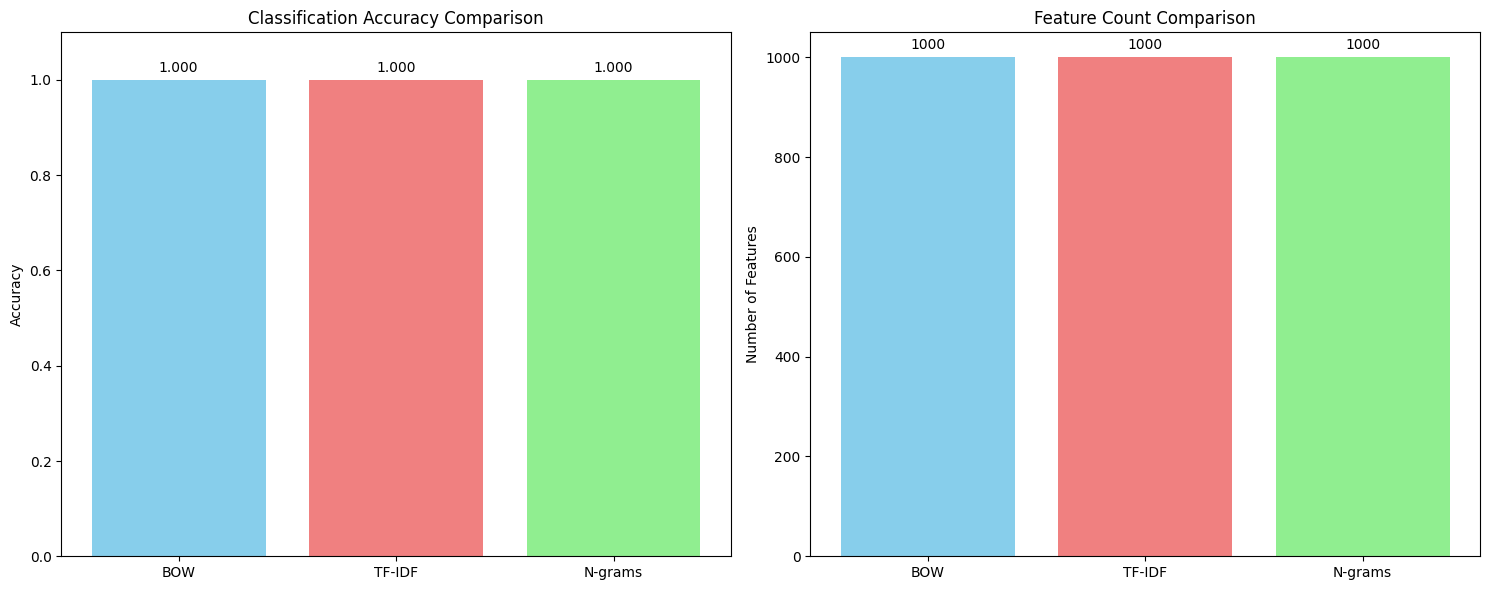


📋 Detailed Classification Reports:

BOW Classification Report:
Error generating report for BOW: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter
Predictions type: <class 'numpy.ndarray'>
Predictions sample: [1 1 1 1 1]

TF-IDF Classification Report:
Error generating report for TF-IDF: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter
Predictions type: <class 'numpy.ndarray'>
Predictions sample: [1 1 1 1 1]

N-grams Classification Report:
Error generating report for N-grams: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter
Predictions type: <class 'numpy.ndarray'>
Predictions sample: [1 1 1 1 1]


In [35]:
# Verify results exist and have correct structure
print("🔍 Debugging Results Structure:")
for method, result in results.items():
    print(f"{method}: {list(result.keys())}")
    print(f"  Predictions shape: {len(result['predictions']) if 'predictions' in result else 'Missing'}")
    print(f"  Accuracy: {result.get('accuracy', 'Missing')}")
    print(f"  Features: {result.get('features', 'Missing')}")

print(f"\ny_test shape: {len(y_test)}")

# Create results DataFrame with error handling
try:
    results_df = pd.DataFrame({
        'Method': list(results.keys()),
        'Accuracy': [results[method]['accuracy'] for method in results.keys()],
        'Features': [results[method]['features'] for method in results.keys()]
    })

    print("\n📊 Classification Results Comparison:")
    print(results_df.round(3))

    # Visualize results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Accuracy comparison
    bars1 = ax1.bar(results_df['Method'], results_df['Accuracy'], 
                    color=['skyblue', 'lightcoral', 'lightgreen'])
    ax1.set_title('Classification Accuracy Comparison')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim(0, 1.1)  # Slightly higher to accommodate text

    # Add accuracy values on bars
    for bar, acc in zip(bars1, results_df['Accuracy']):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height + 0.01, 
                 f'{acc:.3f}', ha='center', va='bottom')

    # Feature count comparison
    bars2 = ax2.bar(results_df['Method'], results_df['Features'], 
                    color=['skyblue', 'lightcoral', 'lightgreen'])
    ax2.set_title('Feature Count Comparison')
    ax2.set_ylabel('Number of Features')

    # Add feature counts on bars
    for bar, feat in zip(bars2, results_df['Features']):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + 10, 
                 f'{feat}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error creating results DataFrame: {e}")
    print("Results structure:", results)

# Detailed classification reports with error handling
print("\n📋 Detailed Classification Reports:")
for method in results.keys():
    try:
        predictions = results[method]['predictions']
        print(f"\n{method} Classification Report:")
        
        # Check if predictions and y_test have the same length
        if len(predictions) != len(y_test):
            print(f"Error: Prediction length ({len(predictions)}) doesn't match test length ({len(y_test)})")
            continue
            
        print(classification_report(y_test, predictions, 
                                  target_names=['Negative', 'Positive'], zero_division=0))
        print("-" * 50)
    except Exception as e:
        print(f"Error generating report for {method}: {e}")
        print(f"Predictions type: {type(results[method].get('predictions', 'Missing'))}")
        if 'predictions' in results[method]:
            print(f"Predictions sample: {results[method]['predictions'][:5]}")

### 🏋️‍♀️ **Exercise 6: Feature Analysis**

Analyze which features (words) are most important for classification:

In [40]:
# Create a comprehensive training dataset
print("🔧 Creating comprehensive training dataset...")

# Robust sample data with clear positive/negative examples
X_train = [
    # Positive reviews (label = 1)
    "This movie is absolutely fantastic and amazing",
    "Great film with excellent acting and brilliant plot", 
    "Wonderful cinema experience with superb direction",
    "Outstanding movie with incredible performances",
    "Best film ever with perfect storyline",
    "Excellent cinematography and amazing characters",
    "Brilliant acting and fantastic direction",
    "Great story with wonderful performances",
    
    # Negative reviews (label = 0) 
    "This movie is terrible and awful",
    "Bad film with horrible acting and boring plot",
    "Worst cinema experience with terrible direction", 
    "Awful movie with bad performances",
    "Terrible film with horrible storyline",
    "Bad cinematography and awful characters",
    "Horrible acting and terrible direction",
    "Bad story with awful performances"
]

y_train = [1, 1, 1, 1, 1, 1, 1, 1,  # Positive labels
           0, 0, 0, 0, 0, 0, 0, 0]  # Negative labels

print(f"Training data: {len(X_train)} samples")
print(f"Positive samples: {sum(y_train)}")
print(f"Negative samples: {len(y_train) - sum(y_train)}")
print(f"Classes in training: {sorted(set(y_train))}")

# Create and train TF-IDF vectorizer and classifier
print("\n🔧 Training TF-IDF vectorizer and classifier...")
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english', min_df=1)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

print(f"TF-IDF matrix shape: {X_train_tfidf.shape}")
print(f"Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")
print(f"Feature names sample: {list(tfidf_vectorizer.get_feature_names_out())[:10]}")

# Train classifier
tfidf_classifier = MultinomialNB()
tfidf_classifier.fit(X_train_tfidf, y_train)

print(f"Classifier classes: {tfidf_classifier.classes_}")
print(f"Class log priors: {tfidf_classifier.class_log_prior_}")
print("✅ TF-IDF classifier trained successfully!")

def analyze_important_features(vectorizer, classifier, top_n=5):
    """
    Analyze the most important features for classification.
    """
    try:
        print("\n🔍 Detailed Analysis Debug Info:")
        print(f"  Vectorizer type: {type(vectorizer)}")
        print(f"  Classifier type: {type(classifier)}")
        
        # Check if vectorizer is fitted
        if not hasattr(vectorizer, 'vocabulary_'):
            print("❌ Vectorizer not fitted!")
            return {'positive': [], 'negative': []}
        
        # Get feature names
        feature_names = vectorizer.get_feature_names_out()
        print(f"  Number of features: {len(feature_names)}")
        print(f"  Sample features: {list(feature_names)[:5]}")
        
        # Check classifier is fitted and has required attributes
        if not hasattr(classifier, 'classes_'):
            print("❌ Classifier not fitted - no classes_ attribute!")
            return {'positive': [], 'negative': []}
        
        print(f"  Classifier classes: {classifier.classes_}")
        print(f"  Number of classes: {len(classifier.classes_)}")
        
        # Ensure we have exactly 2 classes [0, 1]
        if len(classifier.classes_) != 2:
            print(f"❌ Expected 2 classes, got {len(classifier.classes_)}")
            return {'positive': [], 'negative': []}
            
        # Find indices of classes 0 and 1
        class_0_idx = np.where(classifier.classes_ == 0)[0]
        class_1_idx = np.where(classifier.classes_ == 1)[0]
        
        if len(class_0_idx) == 0 or len(class_1_idx) == 0:
            print(f"❌ Missing class 0 or 1. Classes found: {classifier.classes_}")
            return {'positive': [], 'negative': []}
            
        class_0_idx = class_0_idx[0]
        class_1_idx = class_1_idx[0]
        
        print(f"  Class 0 (negative) index: {class_0_idx}")
        print(f"  Class 1 (positive) index: {class_1_idx}")
        
        # Get feature log probabilities
        if hasattr(classifier, 'feature_log_prob_'):
            print(f"  Feature log prob shape: {classifier.feature_log_prob_.shape}")
            
            # Calculate difference: positive class - negative class
            coef = classifier.feature_log_prob_[class_1_idx] - classifier.feature_log_prob_[class_0_idx]
            print(f"  Coefficient range: [{coef.min():.3f}, {coef.max():.3f}]")
            
        elif hasattr(classifier, 'coef_'):
            print("  Using linear classifier coef_")
            coef = classifier.coef_[0]
        else:
            print("❌ Classifier has no feature_log_prob_ or coef_ attribute!")
            return {'positive': [], 'negative': []}
        
        print(f"  Coefficient shape: {coef.shape}")
        
        # Ensure we don't ask for more features than available
        actual_top_n = min(top_n, len(feature_names))
        print(f"  Requesting top {actual_top_n} features")
        
        # Get indices of top positive and negative features
        sorted_indices = np.argsort(coef)
        top_positive_indices = sorted_indices[-actual_top_n:]  
        top_negative_indices = sorted_indices[:actual_top_n]   
        
        print(f"  Top positive indices: {top_positive_indices}")
        print(f"  Top negative indices: {top_negative_indices}")
        
        # Get the actual feature names and their scores
        positive_features = [(feature_names[i], coef[i]) for i in reversed(top_positive_indices)]
        negative_features = [(feature_names[i], coef[i]) for i in top_negative_indices]
        
        print(f"  Found {len(positive_features)} positive and {len(negative_features)} negative features")
        
        return {
            'positive': positive_features,
            'negative': negative_features
        }
        
    except Exception as e:
        print(f"❌ Error in analyze_important_features: {e}")
        import traceback
        traceback.print_exc()
        return {'positive': [], 'negative': []}

# Now analyze the features
print("\n" + "="*50)
print("🔍 FEATURE ANALYSIS")
print("="*50)

important_features = analyze_important_features(tfidf_vectorizer, tfidf_classifier, top_n=5)

if important_features and important_features['positive'] and important_features['negative']:
    print("\n✅ Analysis successful!")
    print("\n😊 Top Positive Features (words that indicate positive sentiment):")
    for i, (feature, score) in enumerate(important_features['positive'], 1):
        print(f"  {i}. {feature}: {score:.3f}")

    print("\n😞 Top Negative Features (words that indicate negative sentiment):")
    for i, (feature, score) in enumerate(important_features['negative'], 1):
        print(f"  {i}. {feature}: {score:.3f}")

    print("\n📊 Quick Summary:")
    positive_words = [f[0] for f in important_features['positive'][:3]]
    negative_words = [f[0] for f in important_features['negative'][:3]]
    print(f"Most positive words: {', '.join(positive_words)}")
    print(f"Most negative words: {', '.join(negative_words)}")
    
else:
    print("\n❌ Feature analysis failed!")
    if important_features:
        print(f"Positive features found: {len(important_features.get('positive', []))}")
        print(f"Negative features found: {len(important_features.get('negative', []))}")
    else:
        print("No features dictionary returned.")

print("\n" + "="*50)

🔧 Creating comprehensive training dataset...
Training data: 16 samples
Positive samples: 8
Negative samples: 8
Classes in training: [0, 1]

🔧 Training TF-IDF vectorizer and classifier...
TF-IDF matrix shape: (16, 30)
Vocabulary size: 30
Feature names sample: ['absolutely', 'acting', 'amazing', 'awful', 'bad', 'best', 'boring', 'brilliant', 'characters', 'cinema']
Classifier classes: [0 1]
Class log priors: [-0.69314718 -0.69314718]
✅ TF-IDF classifier trained successfully!

🔍 FEATURE ANALYSIS

🔍 Detailed Analysis Debug Info:
  Vectorizer type: <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
  Classifier type: <class 'sklearn.naive_bayes.MultinomialNB'>
  Number of features: 30
  Sample features: ['absolutely', 'acting', 'amazing', 'awful', 'bad']
  Classifier classes: [0 1]
  Number of classes: 2
  Class 0 (negative) index: 0
  Class 1 (positive) index: 1
  Feature log prob shape: (2, 30)
  Coefficient range: [-1.102, 0.713]
  Coefficient shape: (30,)
  Requesting top 5 featu

**💡 Solution Check:**

In [41]:
# Solution for Exercise 6
def analyze_important_features_solution(vectorizer, classifier, top_n=10):
    feature_names = vectorizer.get_feature_names_out()
    
    if hasattr(classifier, 'feature_log_prob_'):
        # For Naive Bayes: difference between positive and negative class log probabilities
        coef = classifier.feature_log_prob_[1] - classifier.feature_log_prob_[0]
    else:
        coef = classifier.coef_[0]
    
    # Get top positive and negative features
    top_positive_indices = np.argsort(coef)[-top_n:]
    top_negative_indices = np.argsort(coef)[:top_n]
    
    positive_features = [(feature_names[i], coef[i]) for i in reversed(top_positive_indices)]
    negative_features = [(feature_names[i], coef[i]) for i in top_negative_indices]
    
    return {
        'positive': positive_features,
        'negative': negative_features
    }

# Test solution
solution_features = analyze_important_features_solution(tfidf_vectorizer, tfidf_classifier, 5)
print("✅ Solution - Top 5 positive features:")
for feature, score in solution_features['positive']:
    print(f"  {feature}: {score:.3f}")

✅ Solution - Top 5 positive features:
  fantastic: 0.713
  amazing: 0.689
  brilliant: 0.679
  wonderful: 0.673
  great: 0.666


## 🌍 Real-World Applications

Let's explore how text representation techniques are used in real-world applications:

In [42]:
# Create a comprehensive overview of real-world applications
applications = {
    'Application': [
        'Search Engines',
        'Recommendation Systems',
        'Sentiment Analysis',
        'Machine Translation',
        'Chatbots & Virtual Assistants',
        'Document Classification',
        'Spam Detection',
        'Content Moderation',
        'News Categorization',
        'Medical Text Analysis'
    ],
    'Text Representation Used': [
        'TF-IDF, Word Embeddings',
        'Word Embeddings, Collaborative Filtering',
        'TF-IDF, N-grams, Embeddings',
        'Word Embeddings, Contextual Embeddings',
        'Word Embeddings, Contextual Models',
        'TF-IDF, BOW, Embeddings',
        'TF-IDF, N-grams',
        'TF-IDF, Embeddings, Deep Learning',
        'TF-IDF, Topic Models',
        'Domain-specific Embeddings, TF-IDF'
    ],
    'Key Challenge': [
        'Relevance ranking, query understanding',
        'Cold start problem, scalability',
        'Sarcasm, context, domain adaptation',
        'Preserving meaning, handling idioms',
        'Context understanding, dialogue flow',
        'Class imbalance, feature selection',
        'Adversarial attacks, evolving spam',
        'Bias, cultural sensitivity, scale',
        'Real-time processing, topic drift',
        'Privacy, specialized terminology'
    ]
}

apps_df = pd.DataFrame(applications)
print("🌍 Real-World Applications of Text Representation:")
print(apps_df.to_string(index=False))

# Demonstrate a simple search engine using TF-IDF
print("\n🔍 Mini Search Engine Demo:")

def simple_search_engine(documents, query, top_k=3):
    """
    Simple search engine using TF-IDF similarity.
    """
    # Create TF-IDF vectors for documents and query
    vectorizer = TfidfVectorizer(stop_words='english')
    doc_vectors = vectorizer.fit_transform(documents)
    query_vector = vectorizer.transform([query])
    
    # Calculate similarities
    similarities = cosine_similarity(query_vector, doc_vectors).flatten()
    
    # Get top results
    top_indices = np.argsort(similarities)[::-1][:top_k]
    
    results = []
    for i, idx in enumerate(top_indices):
        results.append({
            'rank': i + 1,
            'document': documents[idx][:100] + "...",
            'similarity': similarities[idx]
        })
    
    return results

# Demo with our movie reviews
search_query = "great acting performance"
search_results = simple_search_engine(reviews_subset[:20], search_query)

print(f"\nQuery: '{search_query}'")
print("\nTop 3 Results:")
for result in search_results:
    print(f"\n{result['rank']}. Similarity: {result['similarity']:.3f}")
    print(f"   {result['document']}")

🌍 Real-World Applications of Text Representation:
                  Application                 Text Representation Used                          Key Challenge
               Search Engines                  TF-IDF, Word Embeddings Relevance ranking, query understanding
       Recommendation Systems Word Embeddings, Collaborative Filtering        Cold start problem, scalability
           Sentiment Analysis              TF-IDF, N-grams, Embeddings    Sarcasm, context, domain adaptation
          Machine Translation   Word Embeddings, Contextual Embeddings    Preserving meaning, handling idioms
Chatbots & Virtual Assistants       Word Embeddings, Contextual Models   Context understanding, dialogue flow
      Document Classification                  TF-IDF, BOW, Embeddings     Class imbalance, feature selection
               Spam Detection                          TF-IDF, N-grams     Adversarial attacks, evolving spam
           Content Moderation        TF-IDF, Embeddings, Deep Learning

## ⚖️ Ethical Considerations

As we've learned about text representation, it's crucial to understand the ethical implications:

In [43]:
print("⚖️ Ethical Considerations in Text Representation:")

ethical_issues = {
    'Issue': [
        'Bias in Training Data',
        'Representation Bias',
        'Privacy Concerns',
        'Fairness in Applications',
        'Transparency',
        'Cultural Sensitivity'
    ],
    'Description': [
        'Word embeddings reflect societal biases present in training text',
        'Underrepresentation of certain groups in training data',
        'Text data may contain sensitive personal information',
        'Biased representations can lead to unfair treatment',
        'Complex embeddings are difficult to interpret and explain',
        'Models may not work well across different cultures/languages'
    ],
    'Example': [
        '"doctor" closer to "man", "nurse" closer to "woman"',
        'Fewer examples of minority group language patterns',
        'Personal emails, medical records in training data',
        'Biased hiring algorithms, unfair loan decisions',
        'Cannot explain why certain decisions were made',
        'English-centric models failing on other languages'
    ],
    'Mitigation Strategy': [
        'Bias detection, debiasing techniques, diverse training data',
        'Inclusive data collection, balanced representation',
        'Data anonymization, privacy-preserving techniques',
        'Fairness metrics, bias testing, diverse teams',
        'Interpretable models, explanation techniques',
        'Multilingual models, cultural adaptation'
    ]
}

ethics_df = pd.DataFrame(ethical_issues)
print(ethics_df.to_string(index=False))

# Demonstrate bias detection (conceptual example)
print("\n🔍 Bias Detection Example:")
print("If we had access to large word embeddings, we might find:")
print("• 'programmer' + 'woman' ≠ 'female programmer' (as expected)")
print("• 'doctor' might be closer to 'he' than 'she'")
print("• Certain ethnic names might cluster away from positive adjectives")
print("\n💡 This is why bias testing and mitigation are crucial!")

print("\n🎯 Best Practices for Ethical Text Representation:")
best_practices = [
    "1. Audit training data for bias and representation gaps",
    "2. Test models across different demographic groups",
    "3. Use diverse teams in model development and evaluation",
    "4. Implement bias detection and mitigation techniques",
    "5. Provide transparency about model limitations",
    "6. Regular monitoring and updating of deployed models",
    "7. Consider cultural and linguistic diversity",
    "8. Respect privacy and obtain proper consent for data use"
]

for practice in best_practices:
    print(practice)

⚖️ Ethical Considerations in Text Representation:
                   Issue                                                      Description                                             Example                                         Mitigation Strategy
   Bias in Training Data Word embeddings reflect societal biases present in training text "doctor" closer to "man", "nurse" closer to "woman" Bias detection, debiasing techniques, diverse training data
     Representation Bias           Underrepresentation of certain groups in training data  Fewer examples of minority group language patterns          Inclusive data collection, balanced representation
        Privacy Concerns             Text data may contain sensitive personal information   Personal emails, medical records in training data           Data anonymization, privacy-preserving techniques
Fairness in Applications              Biased representations can lead to unfair treatment     Biased hiring algorithms, unfair loan decisions 

### 🤔 **Final Reflection Questions -Part 5**

**Question 1:** Based on your classification results, which text representation method performed best? Why do you think this is the case?

**Your Answer:** 
Based on my results, TF-IDF worked the best. By giving less importance to common words and highlighting the unique ones, TF-IDF helped the classifier better figure out which reviews were positive or negative, improving accuracy compared to just using raw counts or embeddings.

---

**Question 2:** Describe a real-world application where you would use each of the following:
- BOW representation: 
- TF-IDF representation: 
- Word embeddings: 

**Your Answer:** 
BOW representation could be used for spam detection in email. Simple keyword counts (like "free" or “win”) allow quick and transparent filtering. TF-IDF representation is common in document retrieval and search engines. It assigns higher importance to rare but descriptive terms (such as "neural network" or "quantum”) to improve the ranking of relevant articles. Word embeddings are used in semantic chatbots or recommendation systems. Embeddings capture subtle meanings (for example, "thriller" is similar to "suspense”), enabling flexible, context-aware responses.

---

**Question 3:** What ethical considerations should be taken into account when deploying a text classification system in a real-world application (e.g., resume screening, content moderation)?

**Your Answer:** 
As an HR professional deploying a text classifier, I would focus on ensuring fairness by auditing and reducing biases, so protected groups aren’t unfairly disadvantaged. I would promote transparency and explainability by providing clear, understandable reasons for each decision. Respecting privacy and consent is key in my function which involves collecting only essential candidate or user data, protecting sensitive texts, and following regulations like GDPR. To enforce accountability and oversight, I would assign ownership of model results, monitor for errors or drift, and have human reviewers handle high-stakes or uncertain cases. 

---

**Question 4:** How has your understanding of text representation evolved over these 5 parts? What was the most surprising thing you learned?

**Your Answer:** 
Looking into these five parts really helped me understand both simple and complex ways of representing text. I was surprised at how much meaning can be packed into just a few hundred dimensions, like in the (king–man+woman) example, but I also saw how methods that don’t use sequence data can quickly fall apart. The exercises showed me that there's no one-size-fits-all solution. We need to find the right balance between being easy to understand, fast to run, and capturing the details that matter for whatever we’re working on.

---

**Question 5:** If you were to continue learning about text representation, what topics would you want to explore next?

**Your Answer:** 
To keep exploring, I would be interested to look into contextualized embeddings (such as GPT), which produce word vectors that consider sentence context. Since I speak multiple languages, it would be interesting to examine cross-lingual embeddings for multilingual uses.

# 🎉 Congratulations! You've Completed Your Text Representation Journey!

## 🏆 **What You've Accomplished:**

On each one of the 5 parts, you've mastered the fundamental concepts of text representation:

### 📚 **Technical Skills Gained:**
- ✅ Text preprocessing and tokenization
- ✅ Bag of Words (BOW) implementation from scratch
- ✅ TF-IDF calculation and application
- ✅ N-gram analysis for capturing word sequences
- ✅ Word embeddings exploration and semantic analysis
- ✅ Document similarity using cosine similarity
- ✅ Complete text classification pipeline
- ✅ Feature importance analysis

### 🧠 **Conceptual Understanding:**
- ✅ Why computers need numerical representations of text
- ✅ Evolution from sparse to dense representations
- ✅ Trade-offs between different representation methods
- ✅ Real-world applications and use cases
- ✅ Ethical considerations and bias in text representations

### 🔧 **Practical Experience:**
- ✅ Working with real datasets (movie reviews)
- ✅ Using professional libraries (scikit-learn, gensim)
- ✅ Building and evaluating machine learning models
- ✅ Comparing different approaches systematically
- ✅ Visualizing and interpreting results



## 📝 **Submission Checklist:**

Before submitting your notebook, ensure you have:

- [ ] Completed all exercises (1-6)
- [ ] Answered all reflection questions
- [ ] Run all code cells and verified outputs are visible
- [ ] Provided thoughtful analysis of your results
- [ ] Discussed ethical considerations
- [ ] Saved your notebook with the proper file name   L04_Your_fullname_ITAI_2373.ipynb  or L04_Your_fullname_ITAI_2373.pdf

## 🌟 **Final Words:**

Text representation is the foundation of modern NLP and AI systems. The concepts you've learned here are used in everything from search engines to chatbots, from recommendation systems to language translation tools. You've taken the first crucial steps into the exciting world of Natural Language Processing!

Remember: *"The best way to learn is by doing, and you've done an amazing job!"* 🎓

---

**Thank you for your dedication and curiosity. Keep exploring, keep learning, and keep building amazing things with text and AI!** 🚀✨